In [1]:
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# test_full_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_full.parquet'
# train_full_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_full.parquet'

# Merge datasets

## Cargamos los datasets

In [2]:
# Cargar los datasets
test = pd.read_parquet(test_data_path)
train = pd.read_parquet(train_data_path)
products = pd.read_parquet(products_data_path)
user_details = pd.read_parquet(user_details_path)

# Verificar las primeras filas de cada dataset cargado
print(test.info())
print(train.info())
print(products.info())
print(user_details.info())

print(test.head())
print(train.head())
print(products.head())
print(user_details.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  int8          
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  int8          
 7   pagetype         29275 non-null  int8          
dtypes: datetime64[ns](2), int32(3), int8(3)
memory usage: 886.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datet

## Paso 1: Unión del Dataset train con products

In [3]:
print(train['partnumber'].dtype)
print(products['partnumber'].dtype)

int32
int32


In [4]:
train_merged = pd.merge(
    train,
    products,
    on='partnumber',
    how='left',
    indicator=True  # Nos permitirá ver el resultado de la unión
)

In [ ]:
# Revisar el conteo de cada categoría en el indicador de unión
print(train_merged['_merge'].value_counts())

_merge
both          46551445
left_only            0
right_only           0
Name: count, dtype: int64


In [6]:
# Obtener todas las columnas de products excepto 'partnumber'
product_cols = [col for col in products.columns if col != 'partnumber']
# Contar valores nulos en las columnas de products dentro de train_merged
null_counts = train_merged[product_cols].isnull().sum()
print(null_counts)
# Calcular la proporción de valores nulos
total_records = len(train_merged)
null_proportions = (null_counts / total_records) * 100
print(null_proportions)

discount             0
color_id             0
cod_section          0
family               0
embedding_reduced    0
dtype: int64
discount             0.0
color_id             0.0
cod_section          0.0
family               0.0
embedding_reduced    0.0
dtype: float64


## Paso 2: Unión del Dataset test con products

In [7]:
print(test['partnumber'].dtype)
print(products['partnumber'].dtype)

int32
int32


In [8]:
test_merged = pd.merge(
    test,
    products,
    on='partnumber',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [9]:
print(test_merged['_merge'].value_counts())

_merge
both          29275
left_only         0
right_only        0
Name: count, dtype: int64


In [10]:
# Columnas de products (excepto 'partnumber')
product_cols = [col for col in products.columns if col != 'partnumber']

# Contar valores nulos
null_counts = test_merged[product_cols].isnull().sum()
print(null_counts)

# Proporción de valores nulos
total_records = len(test_merged)
null_proportions = (null_counts / total_records) * 100
print(null_proportions)

discount             0
color_id             0
cod_section          0
family               0
embedding_reduced    0
dtype: int64
discount             0.0
color_id             0.0
cod_section          0.0
family               0.0
embedding_reduced    0.0
dtype: float64


In [11]:
print(test_merged.head())

   session_id       date         timestamp_local  user_id  country  \
0         746 2024-06-15 2024-06-15 18:36:47.390       -1       57   
1         746 2024-06-15 2024-06-15 18:37:04.052       -1       57   
2         746 2024-06-15 2024-06-15 18:37:48.159       -1       57   
3         746 2024-06-15 2024-06-15 18:38:19.899       -1       57   
4         746 2024-06-15 2024-06-15 18:38:46.492       -1       57   

   partnumber  device_type  pagetype  discount  color_id  cod_section  family  \
0        1254            1        24         0       404            1      30   
1       32544            1        24         0       219            1     146   
2       12639            1        24         0        83            1      53   
3       18048            1        24         0        53            1      29   
4       13295            1        24         0       181            1      51   

                                   embedding_reduced _merge  
0  [-4.8152103, -0.572029, -0.

## Paso intermedio - .info()

In [12]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   pagetype           int8          
 9   discount           int8          
 10  color_id           int32         
 11  cod_section        int8          
 12  family             int32         
 13  embedding_reduced  object        
 14  _merge             category      
dtypes: category(1), datetime64[ns](2), int32(5), int8(6), object(1)
memory usage: 2.2+ GB


In [13]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29275 non-null  int32         
 1   date               29275 non-null  datetime64[ns]
 2   timestamp_local    29275 non-null  datetime64[ns]
 3   user_id            29275 non-null  int32         
 4   country            29275 non-null  int8          
 5   partnumber         29275 non-null  int32         
 6   device_type        29275 non-null  int8          
 7   pagetype           29275 non-null  int8          
 8   discount           29275 non-null  int8          
 9   color_id           29275 non-null  int32         
 10  cod_section        29275 non-null  int8          
 11  family             29275 non-null  int32         
 12  embedding_reduced  29275 non-null  object        
 13  _merge             29275 non-null  category      
dtypes: cat

In [14]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577494 entries, 0 to 577493
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  577494 non-null  int32  
 1   country  577494 non-null  int8   
 2   R        577494 non-null  float32
 3   F        577494 non-null  float32
 4   M        577494 non-null  float32
dtypes: float32(3), int32(1), int8(1)
memory usage: 9.4 MB


## Paso 3: Unión del Dataset train_merged con user_details

In [15]:
# Eliminar la columna '_merge' de train_merged
train_merged = train_merged.drop(columns=['_merge'])

# Ahora puedes realizar el merge con user_details
train_full = pd.merge(
    train_merged,
    user_details,
    on='user_id',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [16]:
# Verificar el resultado del merge
print(train_full['_merge'].value_counts())

_merge
left_only     39694715
both           7118844
right_only           0
Name: count, dtype: int64


In [17]:
num_anonymous = (train_merged['user_id'] == -1).sum()
print(f"Número de registros con user_id = -1: {num_anonymous}")

Número de registros con user_id = -1: 39694715


In [18]:
# Crear máscara para registros en 'left_only'
left_only_mask = (train_full['_merge'] == 'left_only')

# De esos registros, identificar los que tienen 'user_id' distinto de -1
missing_users_mask = left_only_mask & (train_full['user_id'] != -1)

missing_users_count = missing_users_mask.sum()
print(f"Número de registros con user_id != -1 sin correspondencia en user_details: {missing_users_count}")

Número de registros con user_id != -1 sin correspondencia en user_details: 0


In [19]:
# Crear columna 'anonymous_user'
train_full['anonymous_user'] = (train_full['user_id'] == -1).astype('int8')

In [20]:
median_R = user_details['R'].median()
median_F = user_details['F'].median()
median_M = user_details['M'].median()

In [21]:
anonymous_mask = train_full['anonymous_user'] == 1

train_full.loc[anonymous_mask, 'R'] = median_R
train_full.loc[anonymous_mask, 'F'] = median_F
train_full.loc[anonymous_mask, 'M'] = median_M

In [22]:
# Usar 'country_y' cuando esté disponible, y si no, 'country_x'
train_full['country'] = train_full['country_y'].fillna(train_full['country_x']).astype('int8')

# Eliminar las columnas duplicadas
train_full.drop(['country_x', 'country_y'], axis=1, inplace=True)

In [23]:
null_counts = train_full[['R', 'F', 'M']].isnull().sum()
print(null_counts)

R    0
F    0
M    0
dtype: int64


In [24]:
train_full['R'] = train_full['R'].astype('float32')
train_full['F'] = train_full['F'].astype('float32')
train_full['M'] = train_full['M'].astype('float32')
train_full['anonymous_user'] = train_full['anonymous_user'].astype('int8')

In [25]:
print(train_full.info())
print(train_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  _merge             category      
 17  anonymous_user     int8          
 18  country            int8          
dtypes: category(1), datetime64[ns](2), float32(3), int32(5), int8

In [26]:
# Eliminar la columna '_merge' de 'train_full'
train_full.drop(columns=['_merge'], inplace=True)

## Paso 4: Unión del Dataset test_merged con user_details

In [27]:
print(test_merged['user_id'].dtype)
print(user_details['user_id'].dtype)

int32
int32


In [28]:
# Si existe la columna '_merge', elimínala
if '_merge' in test_merged.columns:
    test_merged.drop(columns=['_merge'], inplace=True)

In [29]:
test_full = pd.merge(
    test_merged,
    user_details,
    on='user_id',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [30]:
print(test_full['_merge'].value_counts())

_merge
left_only     23509
both           6082
right_only        0
Name: count, dtype: int64


In [31]:
# Crear una máscara para registros en 'left_only'
left_only_mask = test_full['_merge'] == 'left_only'

# Contar cuántos de estos registros tienen 'user_id' igual a -1
anonymous_in_left_only = (test_full.loc[left_only_mask, 'user_id'] == -1)
num_anonymous = anonymous_in_left_only.sum()
print(f"Número de usuarios anónimos en 'left_only': {num_anonymous}")

Número de usuarios anónimos en 'left_only': 23509


In [32]:
# Identificar registros en 'left_only' con 'user_id' distinto de -1
logged_in_missing = (test_full.loc[left_only_mask, 'user_id'] != -1)
num_logged_in_missing = logged_in_missing.sum()
print(f"Número de usuarios logueados en 'left_only' sin información en 'user_details': {num_logged_in_missing}")

Número de usuarios logueados en 'left_only' sin información en 'user_details': 0


In [33]:
# Calcular las medianas de 'R', 'F', 'M' desde 'user_details'
median_R = user_details['R'].median()
median_F = user_details['F'].median()
median_M = user_details['M'].median()

# Imputar valores a los usuarios anónimos
anonymous_mask = test_full['user_id'] == -1
test_full.loc[anonymous_mask, 'R'] = median_R
test_full.loc[anonymous_mask, 'F'] = median_F
test_full.loc[anonymous_mask, 'M'] = median_M

In [34]:
test_full['anonymous_user'] = anonymous_mask.astype('int8')

In [35]:
missing_users_mask = (test_full['user_id'] != -1) & (test_full['R'].isnull())

# Imputar valores medianos
test_full.loc[missing_users_mask, 'R'] = median_R
test_full.loc[missing_users_mask, 'F'] = median_F
test_full.loc[missing_users_mask, 'M'] = median_M

In [36]:
test_full['missing_user_info'] = 0
test_full.loc[missing_users_mask, 'missing_user_info'] = 1
test_full['missing_user_info'] = test_full['missing_user_info'].astype('int8')

In [37]:
# Priorizar 'country_y' y usar 'country_x' cuando 'country_y' sea nulo
test_full['country'] = test_full['country_y'].fillna(test_full['country_x']).astype('int8')

# Eliminar las columnas duplicadas
test_full.drop(['country_x', 'country_y'], axis=1, inplace=True)

In [38]:
null_counts = test_full[['R', 'F', 'M']].isnull().sum()
print(null_counts)

R    0
F    0
M    0
dtype: int64


In [39]:
test_full['R'] = test_full['R'].astype('float32')
test_full['F'] = test_full['F'].astype('float32')
test_full['M'] = test_full['M'].astype('float32')

In [40]:
test_full.drop(columns=['_merge'], inplace=True)

In [41]:
print(test_full.info())
print(test_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29591 non-null  int32         
 1   date               29591 non-null  datetime64[ns]
 2   timestamp_local    29591 non-null  datetime64[ns]
 3   user_id            29591 non-null  int32         
 4   partnumber         29591 non-null  int32         
 5   device_type        29591 non-null  int8          
 6   pagetype           29591 non-null  int8          
 7   discount           29591 non-null  int8          
 8   color_id           29591 non-null  int32         
 9   cod_section        29591 non-null  int8          
 10  family             29591 non-null  int32         
 11  embedding_reduced  29591 non-null  object        
 12  R                  29591 non-null  float32       
 13  F                  29591 non-null  float32       
 14  M     

In [42]:
test_full.drop(columns=['missing_user_info'], inplace=True)

## Verificación de que train_full y test_full estén alineados

In [43]:
def verificar_alineacion(train_df, test_df, columna_diferente='add_to_cart'):
    """
    Verifica si dos DataFrames tienen las mismas columnas,
    permitiendo una diferencia específica.

    Parámetros:
    - train_df: DataFrame de entrenamiento (por ejemplo, train_full)
    - test_df: DataFrame de prueba (por ejemplo, test_full)
    - columna_diferente: Nombre de la columna que se permite que sea diferente (por defecto 'add_to_cart')

    Retorna:
    - True si los DataFrames están alineados (exceptuando la columna permitida).
    - False si hay diferencias adicionales.
    - Imprime información detallada de las diferencias encontradas.
    """
    # Obtener listas de columnas de cada DataFrame
    columnas_train = set(train_df.columns)
    columnas_test = set(test_df.columns)

    # Remover la columna diferente del conjunto de columnas de train_df
    columnas_train_sin_diferencia = columnas_train - set([columna_diferente])

    # Comparar los conjuntos de columnas
    columnas_solo_en_train = columnas_train_sin_diferencia - columnas_test
    columnas_solo_en_test = columnas_test - columnas_train_sin_diferencia

    if not columnas_solo_en_train and not columnas_solo_en_test:
        print("Los DataFrames están alineados. Las columnas son las mismas, exceptuando '{}'.".format(columna_diferente))
        return True
    else:
        print("Los DataFrames no están alineados. Hay diferencias en las columnas.")
        if columnas_solo_en_train:
            print("Columnas que están en train_df pero no en test_df:")
            print(columnas_solo_en_train)
        if columnas_solo_en_test:
            print("Columnas que están en test_df pero no en train_df:")
            print(columnas_solo_en_test)
        return False
    
verificar_alineacion(train_full, test_full)

Los DataFrames están alineados. Las columnas son las mismas, exceptuando 'add_to_cart'.


True

## Optimización tipo de datos

In [44]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  anonymous_user     int8          
 17  country            int8          
dtypes: datetime64[ns](2), float32(3), int32(5), int8(7), object(1)
memory usage: 2.7+ GB


In [45]:
# Verificar el tipo de datos de los elementos en la columna 'embedding_reduced'
embedding_type = type(train_full['embedding_reduced'].iloc[0])
print(f"Tipo de dato en 'embedding_reduced': {embedding_type}")


Tipo de dato en 'embedding_reduced': <class 'numpy.ndarray'>


## Guardado de dataset full

In [46]:
# test_full.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_full.parquet', index=False)

In [47]:
# Guardar dataset en formato Parquet (más eficiente)
# train_full.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_full.parquet', index=False)
# print("Datasets guardados correctamente.")

In [48]:
# Ruta para guardar el archivo comprimido
# output_path_csv = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_full.csv.gz'

# # Guardar como CSV comprimido
# train_full.to_csv(output_path_csv, index=False, compression='gzip')

# print("Dataset guardado correctamente en formato CSV comprimido.")


In [49]:
# train_full = pd.read_parquet(train_full_path)


In [50]:
# test_full = pd.read_parquet(test_full_path)

---

# Análisis de dataset completo


In [51]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  anonymous_user     int8          
 17  country            int8          
dtypes: datetime64[ns](2), float32(3), int32(5), int8(7), object(1)
memory usage: 2.7+ GB


In [52]:
train_full.head(10)

,session_id,date,timestamp_local,add_to_cart,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,embedding_reduced,R,F,M,anonymous_user,country
0,64,2024-06-06,2024-06-06 16:43:17.389,0,-1,14327,1,24,0,74,1,22,"[-4.1614, -1.9206808, 0.29082885, -0.11142825,...",0.427997,0.337763,0.213572,1,29
1,117,2024-06-08,2024-06-08 15:11:02.782,0,-1,38422,1,24,0,3,1,73,"[0.6177783, 5.1697874, 1.0802383, -2.3842714, ...",0.427997,0.337763,0.213572,1,57
2,117,2024-06-08,2024-06-08 15:11:44.797,0,-1,19763,1,24,0,3,1,156,"[-1.1826484, -1.6953706, -3.823473, 0.22190832...",0.427997,0.337763,0.213572,1,57
3,579,2024-06-05,2024-06-05 19:24:48.397,0,-1,30253,1,24,0,181,1,53,"[0.5049844, 1.4900526, -3.010233, 1.6853281, -...",0.427997,0.337763,0.213572,1,29
4,1220,2024-06-04,2024-06-04 08:21:13.476,0,480729,1592,1,24,0,85,1,73,"[-0.041926634, 5.6078444, 0.12900195, 2.553709...",0.255987,0.276302,0.213848,0,25
5,1220,2024-06-04,2024-06-04 08:21:09.139,0,480729,1592,1,24,0,85,1,73,"[-0.041926634, 5.6078444, 0.12900195, 2.553709...",0.255987,0.276302,0.213848,0,25
6,1220,2024-06-04,2024-06-04 08:21:11.955,0,480729,33771,1,24,0,83,1,73,"[0.14680453, 6.6099815, 1.3532311, 2.495807, 0...",0.255987,0.276302,0.213848,0,25
7,1222,2024-06-13,2024-06-13 06:22:03.307,0,-1,10763,1,24,0,64,2,4,"[-2.7094104, -1.7488836, 1.5389193, -0.6792314...",0.427997,0.337763,0.213572,1,57
8,1222,2024-06-13,2024-06-13 06:17:33.149,0,-1,14731,1,24,0,72,2,195,"[-4.220077, -1.927426, 4.5304337, 1.4908589, -...",0.427997,0.337763,0.213572,1,57
9,1222,2024-06-13,2024-06-13 06:17:57.411,0,-1,5249,1,24,0,83,1,196,"[3.542907, 1.170382, 1.3360965, 0.30384576, 1....",0.427997,0.337763,0.213572,1,57


In [53]:
train_full.describe()

,session_id,date,timestamp_local,add_to_cart,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,R,F,M,anonymous_user,country
count,4.681356e+07,46813559,46813559,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07
mean,2.582787e+06,2024-06-07 06:11:58.837736960,2024-06-07 21:12:19.923700736,5.909410e-02,4.231640e+04,2.171435e+04,1.143908e+00,2.390030e+01,6.614614e-02,1.738896e+02,1.495020e+00,8.771977e+01,4.247685e-01,3.389502e-01,2.140618e-01,8.479320e-01,3.642323e+01
min,1.000000e+00,2024-06-01 00:00:00,2024-06-01 02:00:00.051000,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.289868e+06,2024-06-04 00:00:00,2024-06-04 08:59:11.533999872,0.000000e+00,-1.000000e+00,1.105200e+04,1.000000e+00,2.400000e+01,0.000000e+00,6.400000e+01,1.000000e+00,5.100000e+01,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,2.900000e+01
50%,2.579870e+06,2024-06-07 00:00:00,2024-06-07 18:58:13.899000064,0.000000e+00,-1.000000e+00,2.164800e+04,1.000000e+00,2.400000e+01,0.000000e+00,1.290000e+02,1.000000e+00,7.300000e+01,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,2.900000e+01
75%,3.875433e+06,2024-06-11 00:00:00,2024-06-11 07:13:01.965999872,0.000000e+00,-1.000000e+00,3.242300e+04,1.000000e+00,2.400000e+01,0.000000e+00,3.070000e+02,1.000000e+00,1.500000e+02,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,5.700000e+01
max,5.171848e+06,2024-06-16 00:00:00,2024-06-16 22:11:17.725000,1.000000e+00,5.570060e+05,4.369200e+04,3.000000e+00,3.700000e+01,1.000000e+00,6.380000e+02,4.000000e+00,2.170000e+02,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.200000e+01
std,1.493405e+06,NaN,NaN,2.358007e-01,1.180284e+05,1.248664e+04,5.076810e-01,1.283467e+00,2.485374e-01,1.489367e+02,9.968480e-01,5.413622e+01,9.221751e-02,5.024896e-02,1.670275e-02,3.590868e-01,1.250859e+01


In [54]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29591 non-null  int32         
 1   date               29591 non-null  datetime64[ns]
 2   timestamp_local    29591 non-null  datetime64[ns]
 3   user_id            29591 non-null  int32         
 4   partnumber         29591 non-null  int32         
 5   device_type        29591 non-null  int8          
 6   pagetype           29591 non-null  int8          
 7   discount           29591 non-null  int8          
 8   color_id           29591 non-null  int32         
 9   cod_section        29591 non-null  int8          
 10  family             29591 non-null  int32         
 11  embedding_reduced  29591 non-null  object        
 12  R                  29591 non-null  float32       
 13  F                  29591 non-null  float32       
 14  M     

In [55]:
test_full['embedding_reduced']

0        [-4.8152103, -0.572029, -0.41065362, -4.352932...
1        [-4.054006, -2.4868166, 0.9607191, 0.33247072,...
2        [-1.825327, 0.5022584, -1.4124609, 1.111515, 0...
3        [1.2010704, -2.4244006, -0.0040476536, 0.93490...
4        [5.233572, -1.2780403, 1.3953472, 0.04876877, ...
                               ...                        
29586    [-1.529503, 2.322625, -0.83470744, 2.9792473, ...
29587    [-1.1259086, -0.0064389287, -1.91979, 2.205829...
29588    [-1.403401, -0.9720455, -0.07103868, -1.908249...
29589    [-0.7122815, -2.1542575, -0.5517243, -1.211450...
29590    [3.6568806, -2.0477653, -3.1312523, -0.8281567...
Name: embedding_reduced, Length: 29591, dtype: object

In [56]:
test_full.head()

,session_id,date,timestamp_local,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,embedding_reduced,R,F,M,anonymous_user,country
0,746,2024-06-15,2024-06-15 18:36:47.390,-1,1254,1,24,0,404,1,30,"[-4.8152103, -0.572029, -0.41065362, -4.352932...",0.427997,0.337763,0.213572,1,57
1,746,2024-06-15,2024-06-15 18:37:04.052,-1,32544,1,24,0,219,1,146,"[-4.054006, -2.4868166, 0.9607191, 0.33247072,...",0.427997,0.337763,0.213572,1,57
2,746,2024-06-15,2024-06-15 18:37:48.159,-1,12639,1,24,0,83,1,53,"[-1.825327, 0.5022584, -1.4124609, 1.111515, 0...",0.427997,0.337763,0.213572,1,57
3,746,2024-06-15,2024-06-15 18:38:19.899,-1,18048,1,24,0,53,1,29,"[1.2010704, -2.4244006, -0.0040476536, 0.93490...",0.427997,0.337763,0.213572,1,57
4,746,2024-06-15,2024-06-15 18:38:46.492,-1,13295,1,24,0,181,1,51,"[5.233572, -1.2780403, 1.3953472, 0.04876877, ...",0.427997,0.337763,0.213572,1,57


In [57]:
test_full.describe()

,session_id,date,timestamp_local,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,R,F,M,anonymous_user,country
count,2.959100e+04,29591,29591,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000
mean,2.597160e+06,2024-06-15 12:09:45.421242880,2024-06-16 01:09:49.993582848,54697.367105,22090.574195,1.213038,23.140989,0.057585,179.691697,1.599236,91.945625,0.424646,0.339115,0.216256,0.794465,34.222770
min,7.460000e+02,2024-06-15 00:00:00,2024-06-15 00:00:35.309000,-1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,1.314990e+06,2024-06-15 00:00:00,2024-06-15 13:50:26.757999872,-1.000000,11537.000000,1.000000,24.000000,0.000000,64.000000,1.000000,51.000000,0.427997,0.337763,0.213572,1.000000,25.000000
50%,2.608824e+06,2024-06-16 00:00:00,2024-06-16 00:17:29.008000,-1.000000,21777.000000,1.000000,24.000000,0.000000,135.000000,1.000000,73.000000,0.427997,0.337763,0.213572,1.000000,34.000000
75%,3.904152e+06,2024-06-16 00:00:00,2024-06-16 14:10:49.025499904,-1.000000,32881.000000,1.000000,24.000000,0.000000,312.000000,3.000000,153.000000,0.427997,0.337763,0.213572,1.000000,34.000000
max,5.168933e+06,2024-06-16 00:00:00,2024-06-16 23:55:50.519000,555819.000000,43679.000000,3.000000,26.000000,1.000000,621.000000,4.000000,210.000000,0.997899,0.689272,0.615459,1.000000,76.000000
std,1.497656e+06,NaN,NaN,129008.024277,12510.034482,0.603723,3.665591,0.232961,148.336993,0.989064,55.114663,0.109256,0.057286,0.018638,0.404099,10.608329


---

# 🔎 **Análisis del Problema**

### **Objetivo:**
Construir un sistema de recomendación que sugiera **5 productos** por sesión en el dataset de **test**, optimizando la métrica **NDCG**. 

---

## 📊 **Análisis de los Datos**
### **Datos Disponibles**
1. **Usuarios**
   - `user_id`: Algunos son `-1` (usuarios anónimos, no logueados).
   - `R`, `F`, `M`: Variables clásicas de segmentación de clientes en análisis RFM.
   - `country`: Podría influir en la preferencia de productos.

2. **Productos**
   - `embedding_reduced`: Representaciones latentes de imágenes de productos (PCA de 1280 a 100).
   - `color_id`, `cod_section`, `family`: Categóricas relevantes para identificar similitudes entre productos.

3. **Eventos de Interacción (Train y Test)**
   - `session_id`: Identificador de la sesión.
   - `timestamp_local`: Orden cronológico de eventos.
   - `pagetype`: Tipo de página visitada.
   - `add_to_cart` (Solo en Train): Variable objetivo en el entrenamiento.
   - `anonymous_user`: Identifica si el usuario está logueado o no.

---

## 🛠 **Desafíos Claves**
### **1️⃣ Estructura del Dataset**
- **Dataset Gigante**: Más de **46M de filas** en `train_full`. Esto es un reto en términos de memoria y cómputo.
- **Distribución de Clases Desbalanceada**: Solo un **5.9%** de las interacciones llevan a `add_to_cart = 1`. 

### **2️⃣ Modelos Tradicionales No Han Funcionado**
- GBM, LambdaRank y otros métodos tradicionales no han pasado de **236/900** puntos. 
- Esto sugiere que el problema tiene relaciones **no lineales** y que los modelos tradicionales no han aprovechado bien los **embeddings de productos**.

### **3️⃣ Embeddings y Deep Learning**
- El dataset ya tiene embeddings reducidos. **Aprovechar estos embeddings en una arquitectura de deep learning podría mejorar la recomendación.**
- Necesitamos un modelo que **combine la información de usuario, interacción y productos en una representación adecuada**.

---

## 🎯 **Estrategia para Mejorar la Puntuación**
💡 **Hipótesis:** Un modelo de **deep learning basado en sesiones** puede captar mejor los patrones de interacción usuario-producto.

📌 **Propuesta de Modelo:**
- **Modelo Híbrido**:
  - **Factorización de Matriz (Collaborative Filtering)**: Para usuarios logueados.
  - **Modelo basado en sesiones con RNN/Transformer (Self-Attention o GRU)**: Para usuarios anónimos y recomendaciones basadas en sesiones.
- **Pipelines de Features**:
  - Embeddings de productos (`embedding_reduced`).
  - Información RFM de usuarios (`R`, `F`, `M`).
  - Información contextual (`device_type`, `pagetype`, `discount`, `color_id`).
- **Pérdida personalizada** basada en NDCG para optimizar el ranking directamente.

📌 **Infraestructura Consideraciones**:
- **Entrenamiento en GPU (CUDA disponible) con PyTorch**.
- **Uso eficiente de memoria**: Mini-batches y DataLoader optimizado para cargas grandes.

---

## 🚀 **Próximos Pasos**
Para no improvisar, sigamos un plan estructurado:

### **Fase 1: Exploración y Preprocesamiento**
✅ **1.1 Análisis de correlaciones**: ¿Qué features tienen mayor impacto en `add_to_cart`?  
✅ **1.2 Procesamiento eficiente de datos**: Normalización, embeddings en tensores, reducción de memoria.

### **Fase 2: Modelo Deep Learning**
✅ **2.1 Definir arquitectura**: RNN, Transformer o Híbrido.  
✅ **2.2 Entrenamiento y optimización**: AdamW, Scheduler, Batch Normalization.  
✅ **2.3 Evaluación con NDCG**: Validación en conjunto holdout.

### **Fase 3: Generación de Predicciones**
✅ **3.1 Inferencia en test**  
✅ **3.2 Generación del JSON en el formato correcto**  

---

# **Redes Neuronales**


## Correlaciones con `add_to_cart` + Distribuciones + Análisis inicial

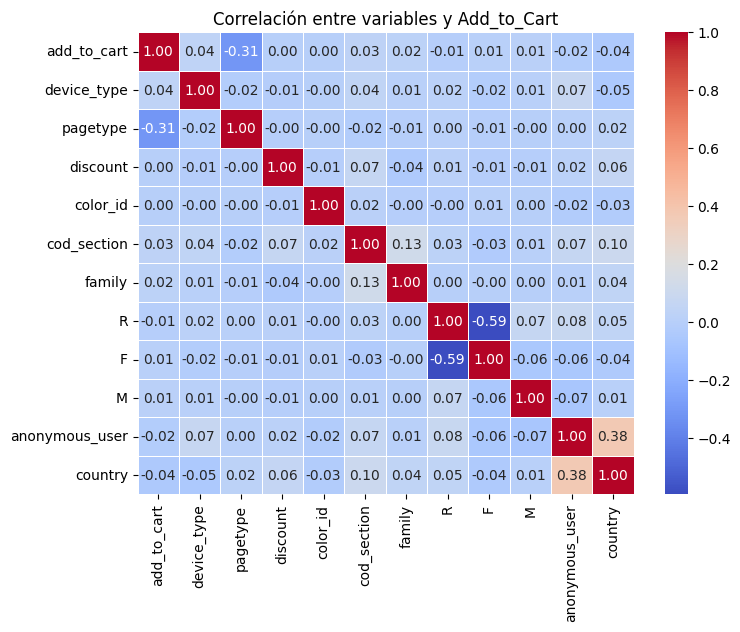

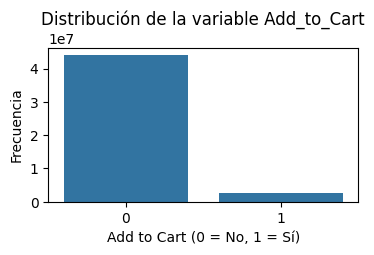

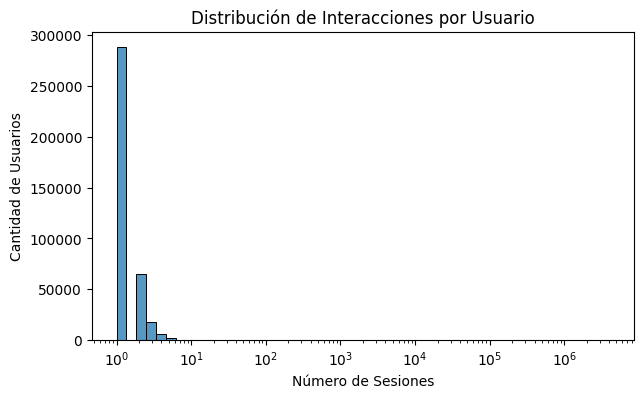

📊 Estadísticas clave de interacciones por usuario:
count    3.800530e+05
mean     1.203452e+01
std      6.588535e+03
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.061730e+06
Name: session_id, dtype: float64


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de correlación
selected_features = ["add_to_cart", "device_type", "pagetype", "discount", "color_id", 
                     "cod_section", "family", "R", "F", "M", "anonymous_user", "country"]

correlation_matrix = train_full[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre variables y Add_to_Cart")
plt.show()

# Distribución de la variable objetivo
plt.figure(figsize=(4, 2))
sns.countplot(x=train_full["add_to_cart"])
plt.title("Distribución de la variable Add_to_Cart")
plt.xlabel("Add to Cart (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del número de interacciones por usuario
interactions_per_user = train_full.groupby("user_id")["session_id"].nunique()

plt.figure(figsize=(7, 4))
sns.histplot(interactions_per_user, bins=50, log_scale=True)
plt.title("Distribución de Interacciones por Usuario")
plt.xlabel("Número de Sesiones")
plt.ylabel("Cantidad de Usuarios")
plt.show()

# Imprime estadísticas clave
print("📊 Estadísticas clave de interacciones por usuario:")
print(interactions_per_user.describe())


### 🔍 **Análisis de los Resultados**

#### **1️⃣ Correlaciones con `add_to_cart`**
- **La variable con mayor impacto es `pagetype` (-0.31)**: 
  - Indica que el tipo de página donde se realizó la interacción influye en la conversión. Posiblemente, ciertas páginas (como "checkout" o "detalles del producto") tengan mayor probabilidad de conversión.
  
- **Otras variables tienen correlaciones muy bajas (<0.1)**:
  - `device_type`, `discount`, `color_id`, `cod_section`, `family`, `country`, `anonymous_user` **tienen poca correlación directa con `add_to_cart`**.
  - `R`, `F`, `M` tampoco muestran una correlación fuerte individualmente, pero podrían ser útiles combinados con otras características.

📌 **Decisión**: 
- Aunque `pagetype` tiene la mayor correlación, parece que las relaciones no son **lineales**. Un modelo tradicional (GBM, LambdaRank) probablemente no capte bien estas relaciones, por lo que **un modelo de deep learning puede aprovechar mejor las interacciones no lineales**.
- **Vamos a trabajar con embeddings** para capturar interacciones latentes entre las features.

#### **2️⃣ Distribución de `add_to_cart`**
- **Desbalance extremo**: La clase `0` (no añadió al carrito) es **más del 90%** de los datos.
- Esto indica que **los modelos pueden estar sesgados** a predecir "no añadir al carrito", lo que explica el bajo score en intentos previos.

📌 **Decisión**: 
- **Necesitamos manejar el desbalance**:
  - Técnicas como **focal loss** o **pérdidas ponderadas** en deep learning pueden ayudar.
  - En **modelos de ranking**, asegurarnos de que se aprende bien la clasificación.


#### **3️⃣ Distribución de Interacciones por Usuario**
- **El 75% de los usuarios tienen solo una sesión**.
- **Solo unos pocos usuarios tienen miles o millones de interacciones**.
- **Implicación**: La mayoría de los usuarios no tienen un historial fuerte, por lo que un **modelo basado en sesiones es clave**.

📌 **Decisión**: 
- **Modelo basado en sesiones (RNN/Transformer)**: Ya que la mayoría de los usuarios tienen poca información histórica, un modelo que capte **secuencias de eventos en la sesión** será clave.
- **Feature Engineering**:
  - Vamos a generar características a nivel de sesión, como **orden temporal, últimas interacciones, productos vistos recientemente**.


#### 🚀 **Próximos Pasos**
1️⃣ **Generar embeddings de usuario-producto basados en interacciones**  
2️⃣ **Diseñar la arquitectura del modelo de deep learning**  
3️⃣ **Definir cómo manejar el desbalance en los datos**  


## Generación de Features para Deep Learning

- 1️⃣ Generar embeddings de usuarios y productos.
- 2️⃣ Extraer features temporales clave de la sesión.
- 3️⃣ Crear secuencias de interacciones para usar en un modelo basado en sesiones.

### Generar Features - Nota: bajamos los pca a 50 por motivos de recursos locales.

In [ ]:
import numpy as np
# Copia del dataset original para evitar modificarlo directamente
df = train_full.copy()

# ✅ 1️⃣ Generar Embeddings de Usuario con dtype compatible
for col in ["R", "F", "M"]:
    mean_val = df.loc[df["user_id"] != -1, col].mean()
    std_val = df.loc[df["user_id"] != -1, col].std() + 1e-9  # Evitar división por cero
    df.loc[df["user_id"] != -1, col] = ((df.loc[df["user_id"] != -1, col] - mean_val) / std_val).astype(np.float32)

# Crear un embedding nulo para usuarios anónimos
df.loc[df["user_id"] == -1, ["R", "F", "M"]] = np.float32(0)

# ✅ 2️⃣ Features Temporales
df["timestamp_local"] = pd.to_datetime(df["timestamp_local"])

# Ordenar por sesión y tiempo
df = df.sort_values(by=["session_id", "timestamp_local"])

# Tiempo desde la última interacción en la sesión (con conversión optimizada)
df["time_since_last"] = df.groupby("session_id")["timestamp_local"].diff().dt.total_seconds().fillna(0).astype(np.float32)

# Posición relativa del evento en la sesión (Normalizada entre 0 y 1)
df["session_position"] = df.groupby("session_id").cumcount() + 1
df["session_relative_position"] = (df["session_position"] / df.groupby("session_id")["session_position"].transform("max")).astype(np.float32)

# Duración total de la sesión
df["session_duration"] = df.groupby("session_id")["timestamp_local"].transform(lambda x: (x.max() - x.min()).total_seconds()).astype(np.float32)

# ✅ 3️⃣ Creación de Secuencias de Interacciones
# Generar listas de productos ordenadas temporalmente por sesión
session_sequences = df.groupby("session_id")["partnumber"].apply(list)

# Tamaño promedio de las sesiones
session_length_stats = session_sequences.apply(len).describe()

# 🔥 Imprimir resultados clave
print("📊 Estadísticas de la longitud de sesiones:")
print(session_length_stats)


# Guardar el resultado de forma eficiente
#df.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet", compression="snappy")

NameError: name 'train_full' is not defined

In [60]:
# Guardar el resultado de forma eficiente
#df.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet", compression="snappy")


#### 📊 **Interpretación de los Datos**
1. **Distribución de la Longitud de Sesiones:**
   - **Media: 10.2 interacciones por sesión**.
   - **Mediana: 3 interacciones por sesión** → **Más del 50% de las sesiones son muy cortas**.
   - **75% de las sesiones tienen ≤ 10 interacciones**.
   - **Sesión más larga: 7481 interacciones**.

2. **Implicaciones para el Modelo:**
   - **Muchas sesiones son cortas**, por lo que los modelos basados en secuencias deben manejar bien entradas con pocas interacciones.
   - **Sesiones largas son raras**, pero pueden contener patrones valiosos.
   - **Debemos limitar la longitud máxima de secuencias en el modelo** (Ejemplo: usar solo las últimas 50 interacciones como máximo).


## Preparación de Datos para Deep Learning

### 📌 Modelo Recomendado: Transformer o GRU


Como tenemos datos secuenciales (sesiones de usuarios con interacciones temporales), **un modelo basado en secuencias es clave**.

📌 **Dos opciones viables**:
1. **GRU (Gated Recurrent Units)**
   - Menos costoso computacionalmente.
   - Funciona bien con secuencias cortas (~10 eventos promedio en nuestro caso).
   - Fácil de entrenar.

2. **Transformer (Self-Attention)**
   - Más potente, captura **dependencias globales** en las sesiones.
   - Puede ser más costoso computacionalmente.
   - Mejor para sesiones largas.

🔹 **Decisión**:  
📌 Para empezar, implementaremos **GRU**, ya que las sesiones son **cortas (~10 interacciones promedio)** y luego podemos evaluar **Transformer** si el rendimiento no es suficiente.



### Convertir Datos a Tensores

- Convertir cada sesión en una secuencia de tensores con:
    - Embeddings de productos (embedding_reduced).
    - Features adicionales (time_since_last, session_relative_position, etc.).
    - Embeddings de usuario (R, F, M si está logueado, vector nulo si es anónimo).
- Manejar secuencias de diferente longitud:
    - Padding: Si la sesión es corta, rellenamos con ceros.
    - Truncado: Limitamos sesiones largas a un máximo (MAX_SEQ_LENGTH).
- Crear DataLoader para PyTorch:
    - Esto permitirá entrenar el modelo en mini-batches.

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.5.1+cu124
True
NVIDIA GeForce RTX 3070 Ti


In [9]:
# ✅ 1️⃣ Cargar los datos preprocesados
# df = pd.read_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet")

In [3]:
# import json

# # Inspeccionar algunas filas para ver qué está causando el problema
# print(df["embedding_reduced"].head(10))  # ¿Se ven listas de números o algo extraño?
# print(df["embedding_reduced"].dtype)  # ¿Es string, lista o ya es tensor?

# # Buscar valores nulos o corruptos
# print("Valores nulos en embedding_reduced:", df["embedding_reduced"].isnull().sum())
# print("Tipos de datos únicos en embedding_reduced:", df["embedding_reduced"].apply(type).unique())

# Si se ven problemas, podemos aplicar la solución a continuación


NameError: name 'df' is not defined

In [2]:
import torch
from torch.utils.data import IterableDataset, DataLoader
import pandas as pd
import numpy as np

# Definir un tamaño máximo para las secuencias
MAX_SEQ_LENGTH = 50  # Basado en la media y percentiles de sesiones

# ✅ 1️⃣ Crear Dataset como IterableDataset
class IterableSessionDataset(IterableDataset):
    def __init__(self, df_path):
        self.df_path = df_path
        self.feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]

    def __iter__(self):
        df_iter = pd.read_parquet(
            self.df_path, 
            columns=["session_id", "embedding_reduced", "add_to_cart"] + self.feature_cols,
        ).groupby("session_id")

        for _, session_data in df_iter:
            # 🔥 Optimización: Convertir primero a numpy y luego a tensor
            product_embeddings = torch.tensor(np.array(session_data["embedding_reduced"].tolist()), dtype=torch.float32)

            # Features adicionales de la sesión
            session_features = torch.tensor(session_data[self.feature_cols].values, dtype=torch.float32)

            # Producto objetivo (add_to_cart = 1)
            targets = torch.tensor(session_data["add_to_cart"].values, dtype=torch.float32)

            yield product_embeddings, session_features, targets

# ✅ 2️⃣ Collate Function para Padding Dinámico
def collate_fn(batch):
    """Función para hacer padding dinámico en PyTorch DataLoader."""
    
    # Separar los elementos del batch
    product_embeddings, session_features, targets = zip(*batch)

    # Obtener la longitud máxima en este batch
    max_len = min(max([x.shape[0] for x in product_embeddings]), MAX_SEQ_LENGTH)

    # Crear tensores con padding
    padded_embeddings = torch.zeros((len(batch), max_len, product_embeddings[0].shape[1]))
    padded_features = torch.zeros((len(batch), max_len, session_features[0].shape[1]))
    padded_targets = torch.zeros((len(batch), max_len))

    # Rellenar los tensores
    for i in range(len(batch)):
        seq_len = min(product_embeddings[i].shape[0], max_len)
        padded_embeddings[i, :seq_len] = product_embeddings[i][:seq_len]
        padded_features[i, :seq_len] = session_features[i][:seq_len]
        padded_targets[i, :seq_len] = targets[i][:seq_len]

    return padded_embeddings, padded_features, padded_targets

# ✅ 3️⃣ Crear `DataLoader` con `IterableDataset`
train_dataset = IterableSessionDataset("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet")
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=0, collate_fn=collate_fn)

# 🔥 Imprimir una muestra para verificar
sample_batch = next(iter(train_loader))
print(f"🔍 Sample Batch Shapes:")
print(f"- Product Embeddings: {sample_batch[0].shape} (batch_size, MAX_SEQ_LENGTH, embedding_dim)")
print(f"- Session Features: {sample_batch[1].shape} (batch_size, MAX_SEQ_LENGTH, feature_dim)")
print(f"- Targets: {sample_batch[2].shape} (batch_size, MAX_SEQ_LENGTH)")


KeyboardInterrupt: 

#### **📊 Dimensiones del Batch**


1️⃣ **Product Embeddings (`torch.Size([64, 50, 50])`)**  
   - `batch_size=64`
   - `MAX_SEQ_LENGTH=50`
   - `embedding_dim=50` (PCA reducido)

2️⃣ **Session Features (`torch.Size([64, 50, 6])`)**  
   - `batch_size=64`
   - `MAX_SEQ_LENGTH=50`
   - `feature_dim=6` (`time_since_last`, `session_relative_position`, `session_duration`, `R`, `F`, `M`)

3️⃣ **Targets (`torch.Size([64, 50])`)**  
   - `batch_size=64`
   - `MAX_SEQ_LENGTH=50`
   - Es un vector binario que indica si el producto fue añadido al carrito (`add_to_cart`).


### Construcción del Modelo GRU para Recomendaciones

#### **📌 Diseño del Modelo**


El modelo **GRU** tomará como entrada:
1. **Embeddings de productos (`torch.Size([batch, MAX_SEQ_LENGTH, 50])`)**.
2. **Características de sesión (`torch.Size([batch, MAX_SEQ_LENGTH, 6])`)**.

📌 **Arquitectura del modelo:**
- **Capa GRU**: Procesará la secuencia y capturará dependencias temporales.
- **Capa Fully Connected (Linear)**: Convertirá las representaciones de GRU en puntuaciones de ranking.
- **Activación Sigmoide**: Para predecir la probabilidad de `add_to_cart` (0 o 1).



### Estructura del Modelo

### Entrenamiento del Modelo GRU


#### 📌 Estrategia de Entrenamiento


1. **Función de Pérdida:**  
   - Usaremos `BCEWithLogitsLoss()` porque es un problema de clasificación binaria (`add_to_cart`).
   - `sigmoid` ya está en el modelo, pero PyTorch maneja `BCEWithLogitsLoss()` de manera eficiente.

2. **Optimizador:**  
   - Usaremos `Adam` con un `learning_rate=0.001` para una convergencia estable.

3. **Entrenamiento en GPU:**  
   - Si está disponible, movemos los datos y el modelo a **CUDA** para acelerar el entrenamiento.

4. **Métricas:**  
   - Reportaremos la `loss` en cada epoch.
   - En futuras fases, evaluaremos la métrica `NDCG` (Ranking de Recomendaciones).


📌 **Explicación del Código**
- ✅ `BCEWithLogitsLoss():` Se encarga de aplicar la función sigmoide y calcular la pérdida.
- ✅ `optimizer.zero_grad():` Borra los gradientes antes de cada forward pass.
- ✅ `loss.backward() y optimizer.step():` Calcula y aplica la actualización de pesos.
- ✅ Métricas de entrenamiento: Se imprime la loss en cada epoch.

#### Código entrenamiento inicial

In [16]:
# Importar las librerías necesarias
import torch
import torch.nn as nn
import torch.optim as optim
import os
import psutil
from torch.utils.data import IterableDataset, DataLoader
import pandas as pd
import numpy as np
import pyarrow.parquet as pq  # Importar pyarrow para manejo eficiente de Parquet
from torch.utils.data import get_worker_info
from sklearn.metrics import roc_auc_score, average_precision_score
from torch.amp import GradScaler, autocast  # Actualizar las importaciones

# ✅ 1️⃣ Configuración del Entrenamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")

# 🔥 Función para Monitoreo de Memoria
def print_memory_usage(epoch=None):
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"🖥️ RAM Usage: {mem_info.rss / 1e9:.2f} GB")
    
    if torch.cuda.is_available():
        print(f"🔥 GPU Usage: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
        print(f"🔥 GPU Cached: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
        
    if epoch is not None:
        print(f"📊 Memoria después del Epoch {epoch}")

# ✅ 2️⃣ Definir Modelo Ajustado
class GRURecommender(nn.Module):
    def __init__(self, input_dim=50, hidden_dim=128, num_layers=2, output_dim=1):
        super(GRURecommender, self).__init__()
        self.gru = nn.GRU(input_dim + 6, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        # Inicialización de pesos
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)
        # Inicializar los pesos de la GRU
        for name, param in self.gru.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

    def forward(self, product_embeddings, session_features):
        x = torch.cat((product_embeddings, session_features), dim=-1)
        out, _ = self.gru(x)
        out = self.fc(out)
        return out.squeeze(-1)  # Salida sin aplicar Sigmoid

model = GRURecommender().to(device)
print(f"Modelo en: {next(model.parameters()).device}")

# ✅ 3️⃣ Definir Pérdida y Optimizador
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # Usar AdamW y tasa de aprendizaje ajustada
scaler = GradScaler()

print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")

# ✅ 4️⃣ Definir Funciones de Evaluación
def evaluate(model, data_loader):
    model.eval()
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            product_embeddings, session_features, targets = batch

            # Mover datos a dispositivo
            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            # Forward Pass
            outputs = model(product_embeddings, session_features)
            outputs = torch.sigmoid(outputs)  # Aplicar Sigmoid para obtener probabilidades

            all_targets.extend(targets.cpu().numpy().flatten())
            all_outputs.extend(outputs.cpu().numpy().flatten())

    # Convertir a arrays numpy
    all_targets = np.array(all_targets)
    all_outputs = np.array(all_outputs)

    # Calcular métricas
    try:
        auc_roc = roc_auc_score(all_targets, all_outputs)
    except ValueError:
        auc_roc = float('nan')
    average_precision = average_precision_score(all_targets, all_outputs)
    # Calcular MAP@K
    mapk_score = calculate_mapk(all_targets, all_outputs, k=5)

    return auc_roc, average_precision, mapk_score

def calculate_mapk(actuals, predictions, k=5):
    """
    Calcula MAP@K para un conjunto de predicciones y etiquetas reales.
    """
    # Ordenar las predicciones y etiquetas
    indices = np.argsort(-predictions)
    actuals_sorted = actuals[indices]
    top_k = actuals_sorted[:k]
    return np.mean(top_k)

# ✅ 5️⃣ Ajustes en la Función de Entrenamiento con Comprobaciones
def train(model, train_dataset, val_dataset, criterion, optimizer, epochs):
    scaler = GradScaler()
    for epoch in range(epochs):
        model.train()
        print(f"--- Epoch {epoch+1}/{epochs} ---")

        # Crear DataLoader para entrenamiento
        train_loader = DataLoader(
            train_dataset,
            batch_size=64,  # Incrementar el batch size si la memoria lo permite
            shuffle=False,
            num_workers=0,
            collate_fn=collate_fn,
            pin_memory=True
        )

        total_loss = 0.0
        batch_count = 0
        print_memory_usage(epoch="Inicio")
        print("Iniciando el bucle de batches...")

        for batch_idx, batch in enumerate(train_loader):
            product_embeddings, session_features, targets = batch

            # Mover datos a GPU
            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            # Verificar si hay NaN o Inf en los datos
            if torch.isnan(product_embeddings).any() or torch.isnan(session_features).any() or torch.isnan(targets).any():
                print("NaN encontrado en los datos de entrada.")
                continue
            if torch.isinf(product_embeddings).any() or torch.isinf(session_features).any() or torch.isinf(targets).any():
                print("Inf encontrado en los datos de entrada.")
                continue

            # Verificar estadísticas de targets
            print(f"Targets - Min: {targets.min().item()}, Max: {targets.max().item()}, Mean: {targets.mean().item()}")
            print(f"Targets unique values: {torch.unique(targets)}")

            # Verificar estadísticas de inputs
            print(f"Product Embeddings - Min: {product_embeddings.min().item()}, Max: {product_embeddings.max().item()}, Mean: {product_embeddings.mean().item()}")
            print(f"Session Features - Min: {session_features.min().item()}, Max: {session_features.max().item()}, Mean: {session_features.mean().item()}")

            optimizer.zero_grad()
            with autocast(device_type='cuda'):
                outputs = model(product_embeddings, session_features)

                # Verificar estadísticas de outputs antes del clipping
                print(f"Outputs before clipping - Min: {outputs.min().item()}, Max: {outputs.max().item()}, Mean: {outputs.mean().item()}")

                # Aplicar clipping a las salidas
                max_output = 
                outputs = torch.clamp(outputs, min=-max_output, max=max_output)

                # Verificar si hay NaN o Inf en las salidas del modelo
                if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                    print("NaN o Inf encontrado en las salidas del modelo.")
                    continue

                loss = criterion(outputs, targets)

            # Verificar si la pérdida es NaN o Inf
            if torch.isnan(loss) or torch.isinf(loss):
                print(f"Loss inválida: {loss.item()}")
                continue

            scaler.scale(loss).backward()

            # Desescalar los gradientes y verificar si hay NaN o Inf
            scaler.unscale_(optimizer)
            grads_finite = True
            for param in model.parameters():
                if param.grad is not None:
                    if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                        grads_finite = False
                        print("NaN o Inf encontrado en los gradientes. Saltando la actualización.")
                        break

            if grads_finite:
                # Clipping de gradientes
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.zero_grad()
                scaler.update()
                continue

            # Monitorear los gradientes
            total_norm = 0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            print(f"Gradiente total norm: {total_norm}")

            total_loss += loss.item()
            batch_count += 1

            # Limitar el número de batches para pruebas
            if batch_count >= 5:
                break

        avg_loss = total_loss / batch_count if batch_count > 0 else float('inf')
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
        print_memory_usage(epoch=epoch+1)

        # Evaluación en el conjunto de validación
        val_loader = DataLoader(
            val_dataset,
            batch_size=64,
            shuffle=False,
            num_workers=0,
            collate_fn=collate_fn,
            pin_memory=True
        )

        auc_roc, avg_precision, mapk_score = evaluate(model, val_loader)
        print(f"Validation AUC-ROC: {auc_roc:.4f}, Average Precision: {avg_precision:.4f}, MAP@5: {mapk_score:.4f}")

# ✅ 6️⃣ Cargar Dataset con Partición de Entrenamiento y Validación y Comprobaciones
MAX_SEQ_LENGTH = 50

class IterableSessionDataset(IterableDataset):
    def __init__(self, df_path, fraction=1.0, mode='train'):
        self.df_path = df_path
        self.feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]
        self.fraction = fraction  # Fracción de datos a utilizar
        self.mode = mode  # 'train' o 'val'

    def __iter__(self):
        worker_info = get_worker_info()
        if worker_info is None:
            return self._data_iterator()
        else:
            num_workers = worker_info.num_workers
            worker_id = worker_info.id
            return self._data_iterator(worker_id, num_workers)

    def _data_iterator(self, worker_id=0, num_workers=1):
        table = pq.ParquetFile(self.df_path)
        total_row_groups = table.metadata.num_row_groups

        num_row_groups_to_use = max(1, int(total_row_groups * self.fraction))

        # Dividir los row groups entre entrenamiento y validación
        num_row_groups_train = int(num_row_groups_to_use * 0.8)
        num_row_groups_val = num_row_groups_to_use - num_row_groups_train

        if self.mode == 'train':
            start_idx = 0
            end_idx = num_row_groups_train
        else:  # 'val'
            start_idx = num_row_groups_train
            end_idx = num_row_groups_to_use

        # Dividir los row groups entre trabajadores
        batches_per_worker = (end_idx - start_idx + num_workers - 1) // num_workers if num_workers > 0 else end_idx - start_idx
        start = start_idx + worker_id * batches_per_worker
        end = min(start + batches_per_worker, end_idx)
        
        for i in range(start, end):
            batch = table.read_row_group(i)
            df = batch.to_pandas()
            df_iter = df.groupby("session_id")
            for _, session_data in df_iter:
                product_embeddings = session_data["embedding_reduced"].tolist()
                # Verificar que no haya None o valores inválidos en embeddings
                if any(embedding is None or np.isnan(embedding).any() for embedding in product_embeddings):
                    continue
                product_embeddings = torch.tensor(np.array(product_embeddings), dtype=torch.float32)
                session_features = torch.tensor(session_data[self.feature_cols].values, dtype=torch.float32)
                targets = torch.tensor(session_data["add_to_cart"].values, dtype=torch.float32)
                # Asegurar que targets está en el rango [0, 1]
                targets = torch.clamp(targets, min=0.0, max=1.0)
                yield product_embeddings, session_features, targets

def collate_fn(batch):
    product_embeddings, session_features, targets = zip(*batch)
    
    max_len = min(max([x.shape[0] for x in product_embeddings]), MAX_SEQ_LENGTH)
    
    padded_embeddings = torch.zeros((len(batch), max_len, product_embeddings[0].shape[1]))
    padded_features = torch.zeros((len(batch), max_len, session_features[0].shape[1]))
    padded_targets = torch.zeros((len(batch), max_len))
    
    for i in range(len(batch)):
        seq_len = min(product_embeddings[i].shape[0], max_len)
        padded_embeddings[i, :seq_len] = product_embeddings[i][:seq_len]
        padded_features[i, :seq_len] = session_features[i][:seq_len]
        padded_targets[i, :seq_len] = targets[i][:seq_len]
    
    return padded_embeddings, padded_features, padded_targets

# ✅ 7️⃣ Crear Datasets de Entrenamiento y Validación con Datos Sintéticos para Pruebas
class TestDataset(IterableDataset):
    def __iter__(self):
        for _ in range(100):
            product_embeddings = torch.randn(10, 50)
            session_features = torch.randn(10, 6)
            targets = torch.randint(0, 2, (10,), dtype=torch.float32)
            yield product_embeddings, session_features, targets

# Usar el dataset de prueba para entrenamiento y validación
# train_dataset = TestDataset()
# val_dataset = TestDataset()

# Si deseas usar tus datos reales, comenta las líneas anteriores y descomenta las siguientes:

data_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet"
fraction = 0.01  # Usar el 10% de los datos

train_dataset = IterableSessionDataset(
    data_path,
    fraction=fraction,
    mode='train'
)

val_dataset = IterableSessionDataset(
    data_path,
    fraction=fraction,
    mode='val'
)


# ✅ 8️⃣ Ejecutar Entrenamiento
EPOCHS = 5
print(f' --- Número de epochs: {EPOCHS}')
train(model, train_dataset, val_dataset, criterion, optimizer, EPOCHS)

Dispositivo: cuda
Modelo en: cuda:0
Criterion: BCEWithLogitsLoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.01
)
 --- Número de epochs: 5
--- Epoch 1/5 ---
🖥️ RAM Usage: 3.36 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.11 GB
📊 Memoria después del Epoch Inicio
Iniciando el bucle de batches...
Epoch [1/5], Loss: inf
🖥️ RAM Usage: 3.36 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.11 GB
📊 Memoria después del Epoch 1
Validation AUC-ROC: 0.1134, Average Precision: 0.0063, MAP@5: 0.0000
--- Epoch 2/5 ---
🖥️ RAM Usage: 3.38 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.11 GB
📊 Memoria después del Epoch Inicio
Iniciando el bucle de batches...
Epoch [2/5], Loss: inf
🖥️ RAM Usage: 3.38 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.11 GB
📊 Memoria después del Epoch 2
Validation AUC-ROC: 0.1134, Average Precision: 0.0063, MAP@5: 0.

In [ ]:
# torch.save(model.state_dict(), "gru_recommender.pth")
# print("Modelo guardado exitosamente.")


In [ ]:
# model.load_state_dict(torch.load("gru_recommender.pth"))
# model.eval()


---

# Analisis

In [ ]:

import pandas as pd
import pyarrow.parquet as pq

# # Ruta al archivo Parquet
parquet_file_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet"

# # Cargar el dataset
df = pd.read_parquet(parquet_file_path)


In [7]:
# Mostrar información general del dataset
print("Información general del dataset:")
print(df.info())

# Mostrar las primeras filas del dataset
print("\nPrimeras filas del dataset:")
print(df.head())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 46813559 entries, 16260808 to 2667420
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   session_id                 int32         
 1   date                       datetime64[ns]
 2   timestamp_local            datetime64[ns]
 3   add_to_cart                int8          
 4   user_id                    int32         
 5   partnumber                 int32         
 6   device_type                int8          
 7   pagetype                   int8          
 8   discount                   int8          
 9   color_id                   int32         
 10  cod_section                int8          
 11  family                     int32         
 12  embedding_reduced          object        
 13  R                          float32       
 14  F                          float32       
 15  M                          float32       
 16  

In [4]:
# Contar las ocurrencias de cada clase en 'add_to_cart'
class_counts = df['add_to_cart'].value_counts()
total_count = len(df)

# Calcular porcentajes
class_percentages = (class_counts / total_count) * 100

print("\nDistribución de Clases en 'add_to_cart':")
for class_label, count in class_counts.items():
    percentage = class_percentages[class_label]
    print(f"Clase {class_label}: {count} muestras ({percentage:.2f}%)")


Distribución de Clases en 'add_to_cart':
Clase 0: 44047154 muestras (94.09%)
Clase 1: 2766405 muestras (5.91%)


In [3]:
import numpy as np

# Suponiendo que la columna 'embedding_reduced' contiene listas o arrays
print("\nAnálisis de 'embedding_reduced':")

# Convertir la columna de embeddings a un array de NumPy
embeddings_list = df['embedding_reduced'].tolist()
embeddings_array = np.array(embeddings_list)

# Verificar la forma del array
print(f"Forma del array de embeddings: {embeddings_array.shape}")




Análisis de 'embedding_reduced':
Forma del array de embeddings: (46813559, 50)


In [4]:
import numpy as np
# Calcular estadísticas
embeddings_mean = np.mean(embeddings_array, axis=0)
embeddings_min = np.min(embeddings_array, axis=0)
embeddings_max = np.max(embeddings_array, axis=0)

print(f"Media de los embeddings:\n{embeddings_mean}")

print(f"Valores mínimos de los embeddings:\n{embeddings_min}")
print(f"Valores máximos de los embeddings:\n{embeddings_max}")

Media de los embeddings:
[ 0.38445276  0.52674127 -0.6621898   0.37939826  0.27031624  0.46244648
 -0.03490068 -0.16852596 -0.35601518 -0.2840798   0.058965   -0.3738957
 -0.08107193  0.00252848 -0.04038113 -0.07238401 -0.06825227 -0.0215519
  0.00592585  0.06646651 -0.07208008 -0.04137263 -0.08511666 -0.18112195
  0.10171141 -0.23215233 -0.00684927 -0.19512132  0.13966917  0.1505629
  0.11421282  0.00990795 -0.03036655  0.01239679 -0.00937088  0.05938803
 -0.10074748  0.03950267  0.10097911  0.0640632  -0.0479226   0.05178011
 -0.04760619  0.03123388 -0.05027761 -0.05843063  0.03688069 -0.05471404
 -0.0245625   0.03493987]
Valores mínimos de los embeddings:
[-7.0715857 -5.1941104 -5.893287  -6.1941814 -4.5019917 -5.303064
 -4.665234  -5.274407  -6.03997   -5.738062  -5.4849615 -5.344762
 -5.0454617 -4.1775208 -5.2325106 -4.596985  -5.383992  -4.6720862
 -3.7275376 -3.9381657 -4.100453  -3.6037261 -4.130738  -3.6960008
 -4.079943  -4.325851  -4.406954  -3.772935  -4.1931353 -3.203808
 

In [5]:
print("\nAnálisis de 'session_features':")

# Columnas de características de sesión
session_feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]

# Calcular estadísticas descriptivas
print(df[session_feature_cols].describe())


Análisis de 'session_features':
       time_since_last  session_relative_position  session_duration  \
count     4.681356e+07               4.681356e+07      4.681356e+07   
mean      3.173853e+01               5.488508e-01      1.250550e+03   
std       1.506360e+02               2.971418e-01      5.041246e+03   
min       0.000000e+00               1.336720e-04      0.000000e+00   
25%       1.310000e+00               2.941177e-01      2.295180e+02   
50%       7.295000e+00               5.454546e-01      6.563180e+02   
75%       2.264400e+01               8.055556e-01      1.533691e+03   
max       1.878292e+05               1.000000e+00      3.919240e+05   

                  R             F             M  
count  4.681356e+07  4.681356e+07  4.681356e+07  
mean   3.350681e-08  2.486847e-07  4.615620e-07  
std    3.899589e-01  3.899589e-01  3.899589e-01  
min   -1.726004e+00 -2.686010e+00 -5.073584e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.0000

In [9]:
print("\nValores nulos en el dataset:")
print(df.isnull().sum())

# Para los embeddings, verifica si hay alguna entrada nula
null_embeddings = df['embedding_reduced'].isnull().sum()
print(f"\nNúmero de embeddings nulos: {null_embeddings}")


Valores nulos en el dataset:
session_id                   0
date                         0
timestamp_local              0
add_to_cart                  0
user_id                      0
partnumber                   0
device_type                  0
pagetype                     0
discount                     0
color_id                     0
cod_section                  0
family                       0
embedding_reduced            0
R                            0
F                            0
M                            0
anonymous_user               0
country                      0
time_since_last              0
session_position             0
session_relative_position    0
session_duration             0
dtype: int64

Número de embeddings nulos: 0


In [10]:
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Verificar rangos de 'add_to_cart'
print("\nRango de valores en 'add_to_cart':")
print(f"Valores únicos en 'add_to_cart': {df['add_to_cart'].unique()}")

# Verificar si 'add_to_cart' solo contiene 0 y 1
if set(df['add_to_cart'].unique()).issubset({0, 1}):
    print("La variable 'add_to_cart' solo contiene 0 y 1.")
else:
    print("Advertencia: La variable 'add_to_cart' contiene valores distintos de 0 y 1.")


Tipos de datos de cada columna:
session_id                            int32
date                         datetime64[ns]
timestamp_local              datetime64[ns]
add_to_cart                            int8
user_id                               int32
partnumber                            int32
device_type                            int8
pagetype                               int8
discount                               int8
color_id                              int32
cod_section                            int8
family                                int32
embedding_reduced                    object
R                                   float32
F                                   float32
M                                   float32
anonymous_user                         int8
country                                int8
time_since_last                     float32
session_position                      int64
session_relative_position           float32
session_duration                    float32

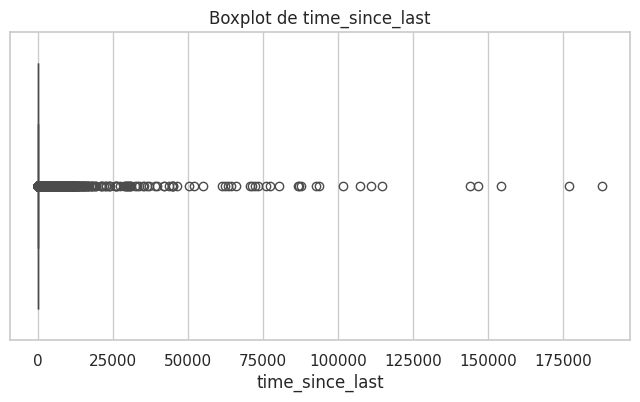

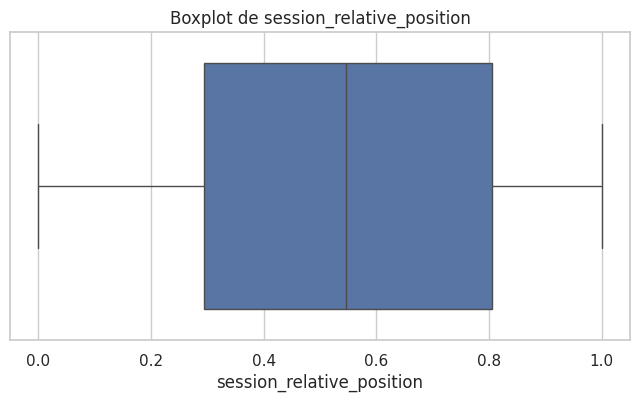

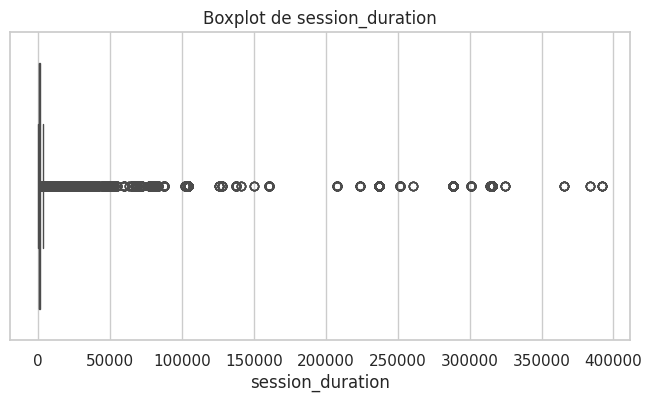

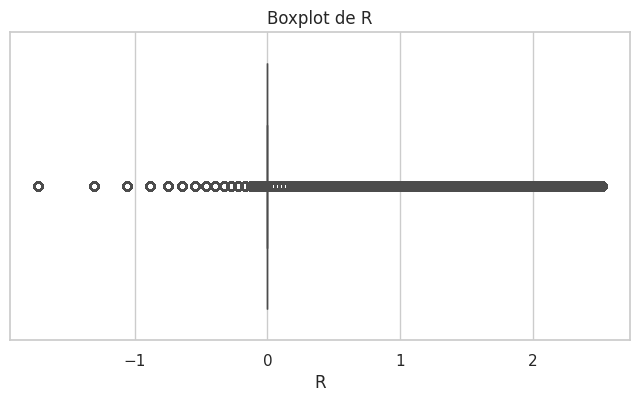

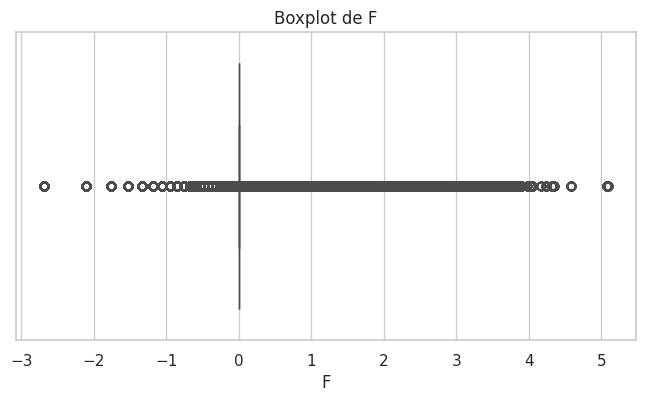

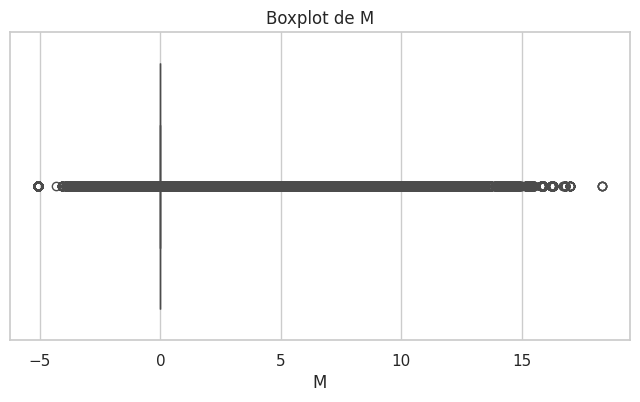

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar Seaborn
sns.set(style="whitegrid")

# Crear un boxplot para cada característica de sesión
for col in session_feature_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


Matriz de correlación:
                           time_since_last  session_relative_position  \
time_since_last                   1.000000                   0.047869   
session_relative_position         0.047869                   1.000000   
session_duration                  0.067033                  -0.030188   
R                                -0.005432                  -0.002801   
F                                 0.004640                   0.001470   
M                                -0.003219                  -0.005520   
add_to_cart                       0.033588                  -0.005485   

                           session_duration         R         F         M  \
time_since_last                    0.067033 -0.005432  0.004640 -0.003219   
session_relative_position         -0.030188 -0.002801  0.001470 -0.005520   
session_duration                   1.000000  0.000022  0.001059  0.006530   
R                                  0.000022  1.000000 -0.593031  0.072742   
F     

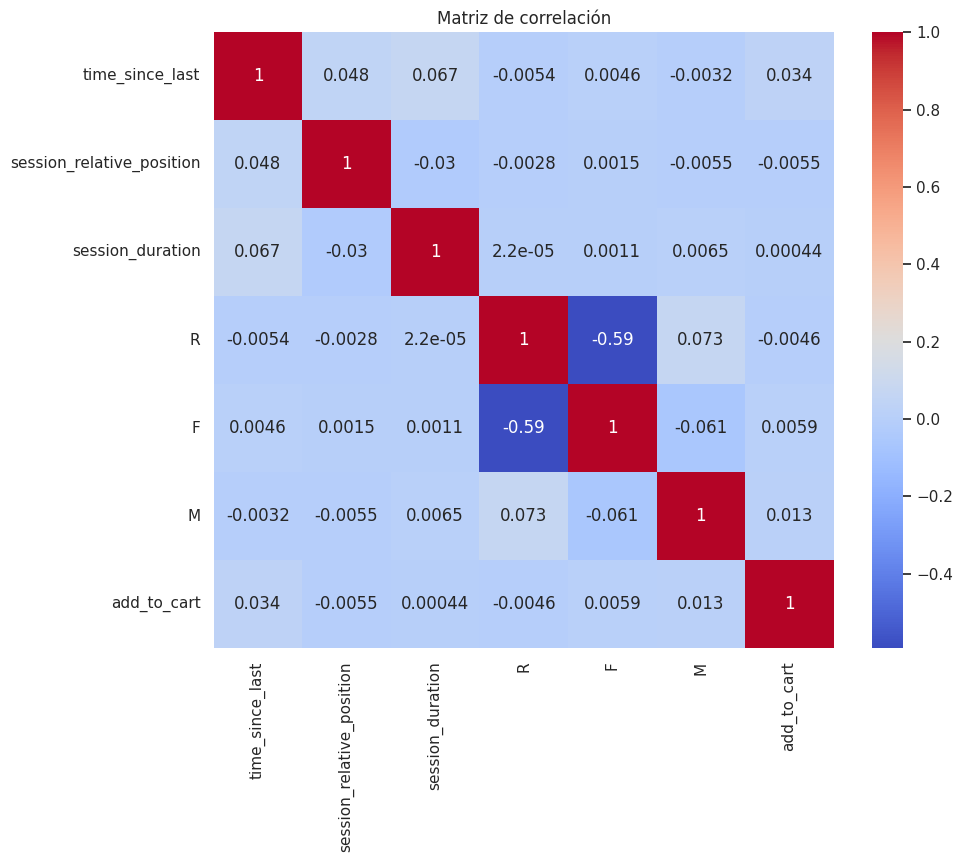

In [12]:
# Calcular la matriz de correlación
corr_matrix = df[session_feature_cols + ['add_to_cart']].corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

---

# Codigo entrenamiento ajustado

In [5]:
# Importar las librerías necesarias
import torch
import torch.nn as nn
import torch.optim as optim
import os
import psutil
from torch.utils.data import IterableDataset, DataLoader
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from torch.utils.data import get_worker_info
from sklearn.metrics import roc_auc_score, average_precision_score
from torch.amp import GradScaler, autocast

# ✅ 1️⃣ Configuración del Entrenamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")

# 🔥 Función para Monitoreo de Memoria
def print_memory_usage(epoch=None):
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"🖥️ RAM Usage: {mem_info.rss / 1e9:.2f} GB")
    
    if torch.cuda.is_available():
        print(f"🔥 GPU Usage: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
        print(f"🔥 GPU Cached: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
        
    if epoch is not None:
        print(f"📊 Memoria después del Epoch {epoch}")

# ✅ 2️⃣ Definir Modelo Ajustado (Simplificado para Pruebas Iniciales)
class GRURecommender(nn.Module):
    def __init__(self, input_dim=50, hidden_dim=64, num_layers=1, output_dim=1):
        super(GRURecommender, self).__init__()
        self.gru = nn.GRU(input_dim + 6, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        # Inicialización de pesos
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)
        # Inicializar los pesos de la GRU
        for name, param in self.gru.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

    def forward(self, product_embeddings, session_features):
        # Normalizar las características de entrada
        product_embeddings = (product_embeddings - product_embeddings.mean(dim=1, keepdim=True)) / (product_embeddings.std(dim=1, keepdim=True) + 1e-6)
        session_features = (session_features - session_features.mean(dim=1, keepdim=True)) / (session_features.std(dim=1, keepdim=True) + 1e-6)

        # Concatenar embeddings y características de sesión
        x = torch.cat((product_embeddings, session_features), dim=-1)
        out, _ = self.gru(x)
        out = self.fc(out)
        return out.squeeze(-1)  # Salida sin aplicar Sigmoid

model = GRURecommender().to(device)
print(f"Modelo en: {next(model.parameters()).device}")

# ✅ 3️⃣ Definir Pérdida y Optimizador con pos_weight
# Calcular pos_weight basado en la distribución de clases
num_negative = 44047154  # Número de muestras de la clase 0
num_positive = 2766405   # Número de muestras de la clase 1
# pos_weight_value = num_negative / num_positive
pos_weight_value = 10.0  # Probar con 5.0 o 10.0
pos_weight = torch.tensor(pos_weight_value, dtype=torch.float32, device=device)
print(f"Pos_weight calculado: {pos_weight.item()}")

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
scaler = torch.amp.GradScaler("cuda")

print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")

# ✅ 4️⃣ Definir Funciones de Evaluación
def evaluate(model, data_loader):
    model.eval()
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            product_embeddings, session_features, targets = batch

            # Mover datos a dispositivo
            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            # Forward Pass
            outputs = model(product_embeddings, session_features)
            outputs = torch.sigmoid(outputs)

            all_targets.extend(targets.cpu().numpy().flatten())
            all_outputs.extend(outputs.cpu().numpy().flatten())

    # Convertir a arrays numpy
    all_targets = np.array(all_targets)
    all_outputs = np.array(all_outputs)

    # Calcular métricas
    try:
        auc_roc = roc_auc_score(all_targets, all_outputs)
    except ValueError:
        auc_roc = float('nan')
    average_precision = average_precision_score(all_targets, all_outputs)
    # Calcular MAP@K
    mapk_score = calculate_mapk(all_targets, all_outputs, k=5)

    return auc_roc, average_precision, mapk_score

def calculate_mapk(actuals, predictions, k=5):
    """
    Calcula MAP@K para un conjunto de predicciones y etiquetas reales.
    """
    # Ordenar las predicciones y etiquetas
    indices = np.argsort(-predictions)
    actuals_sorted = actuals[indices]
    top_k = actuals_sorted[:k]
    return np.mean(top_k)

# ✅ 5️⃣ Ajustes en la Función de Entrenamiento con Comprobaciones
def train(model, train_dataset, val_dataset, criterion, optimizer, epochs):
    scaler = torch.amp.GradScaler("cuda")
    for epoch in range(epochs):
        model.train()
        print(f"--- Epoch {epoch+1}/{epochs} ---")

        # Crear DataLoader para entrenamiento
        train_loader = DataLoader(
            train_dataset,
            batch_size=256,  # Incrementar el batch size si la memoria lo permite
            shuffle=False,
            num_workers=0,
            collate_fn=collate_fn,
            pin_memory=True
        )

        total_loss = 0.0
        batch_count = 0
        print_memory_usage(epoch="Inicio")
        print("Iniciando el bucle de batches...")

        for batch_idx, batch in enumerate(train_loader):
            product_embeddings, session_features, targets = batch

            # Mover datos a GPU
            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            optimizer.zero_grad()
            with autocast(device_type='cuda'):
                outputs = model(product_embeddings, session_features)

                loss = criterion(outputs, targets)

            scaler.scale(loss).backward()

            # Desescalar los gradientes y verificar si hay NaN o Inf
            scaler.unscale_(optimizer)
            grads_finite = True
            for param in model.parameters():
                if param.grad is not None:
                    if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                        grads_finite = False
                        print("NaN o Inf encontrado en los gradientes. Saltando la actualización.")
                        break

            if grads_finite:
                # Clipping de gradientes
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.zero_grad()
                scaler.update()
                continue

            total_loss += loss.item()
            batch_count += 1

            # Opción para limitar el número de batches durante pruebas
            # if batch_count >= 100:
            #     break

        avg_loss = total_loss / batch_count if batch_count > 0 else float('inf')
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
        print_memory_usage(epoch=epoch+1)

        # Evaluación en el conjunto de validación
        val_loader = DataLoader(
            val_dataset,
            batch_size=256,
            shuffle=False,
            num_workers=0,
            collate_fn=collate_fn,
            pin_memory=True
        )

        auc_roc, avg_precision, mapk_score = evaluate(model, val_loader)
        print(f"Validation AUC-ROC: {auc_roc:.4f}, Average Precision: {avg_precision:.4f}, MAP@5: {mapk_score:.4f}")

# ✅ 6️⃣ Cargar Dataset con Normalización y Manejo de Outliers
MAX_SEQ_LENGTH = 50

class IterableSessionDataset(IterableDataset):
    def __init__(self, df_path, fraction=1.0, mode='train'):
        self.df_path = df_path
        self.feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]
        self.fraction = fraction  # Fracción de datos a utilizar
        self.mode = mode  # 'train' o 'val'

    def __iter__(self):
        worker_info = get_worker_info()
        if worker_info is None:
            return self._data_iterator()
        else:
            num_workers = worker_info.num_workers
            worker_id = worker_info.id
            return self._data_iterator(worker_id, num_workers)

    def _data_iterator(self, worker_id=0, num_workers=1):
        table = pq.ParquetFile(self.df_path)
        total_row_groups = table.metadata.num_row_groups

        num_row_groups_to_use = max(1, int(total_row_groups * self.fraction))

        # Dividir los row groups entre entrenamiento y validación
        num_row_groups_train = int(num_row_groups_to_use * 0.8)
        num_row_groups_val = num_row_groups_to_use - num_row_groups_train

        if self.mode == 'train':
            start_idx = 0
            end_idx = num_row_groups_train
        else:  # 'val'
            start_idx = num_row_groups_train
            end_idx = num_row_groups_to_use

        batches_per_worker = (end_idx - start_idx + num_workers - 1) // num_workers if num_workers > 0 else end_idx - start_idx
        start = start_idx + worker_id * batches_per_worker
        end = min(start + batches_per_worker, end_idx)

        for i in range(start, end):
            batch = table.read_row_group(i)
            df = batch.to_pandas()

            # Manejo de outliers en 'time_since_last' y 'session_duration'
            df['time_since_last'] = np.log1p(df['time_since_last'])
            df['session_duration'] = np.log1p(df['session_duration'])

            # Normalizar las características de sesión
            df[self.feature_cols] = (df[self.feature_cols] - df[self.feature_cols].mean()) / (df[self.feature_cols].std() + 1e-6)

            df_iter = df.groupby("session_id")
            for _, session_data in df_iter:
                product_embeddings = session_data["embedding_reduced"].tolist()
                # Verificar que no haya None o valores inválidos en embeddings
                if any(embedding is None or np.isnan(embedding).any() for embedding in product_embeddings):
                    continue
                product_embeddings = torch.tensor(np.array(product_embeddings), dtype=torch.float32)
                session_features = torch.tensor(session_data[self.feature_cols].values, dtype=torch.float32)
                targets = torch.tensor(session_data["add_to_cart"].values, dtype=torch.float32)
                # Asegurar que targets está en el rango [0, 1]
                targets = torch.clamp(targets, min=0.0, max=1.0)
                yield product_embeddings, session_features, targets

def collate_fn(batch):
    product_embeddings, session_features, targets = zip(*batch)
    
    max_len = min(max([x.shape[0] for x in product_embeddings]), MAX_SEQ_LENGTH)
    
    padded_embeddings = torch.zeros((len(batch), max_len, product_embeddings[0].shape[1]))
    padded_features = torch.zeros((len(batch), max_len, session_features[0].shape[1]))
    padded_targets = torch.zeros((len(batch), max_len))
    
    for i in range(len(batch)):
        seq_len = min(product_embeddings[i].shape[0], max_len)
        padded_embeddings[i, :seq_len] = product_embeddings[i][:seq_len]
        padded_features[i, :seq_len] = session_features[i][:seq_len]
        padded_targets[i, :seq_len] = targets[i][:seq_len]
    
    return padded_embeddings, padded_features, padded_targets

# ✅ 7️⃣ Crear Datasets de Entrenamiento y Validación
data_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet"
fraction = 1  # Usar el 1% de los datos para pruebas iniciales

train_dataset = IterableSessionDataset(
    data_path,
    fraction=fraction,
    mode='train'
)

val_dataset = IterableSessionDataset(
    data_path,
    fraction=fraction,
    mode='val'
)

# ✅ 8️⃣ Ejecutar Entrenamiento
EPOCHS = 5
print(f' --- Número de epochs: {EPOCHS}')
train(model, train_dataset, val_dataset, criterion, optimizer, EPOCHS)

Dispositivo: cuda
Modelo en: cuda:0
Pos_weight calculado: 10.0
Criterion: BCEWithLogitsLoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    weight_decay: 0.01
)
 --- Número de epochs: 5
--- Epoch 1/5 ---
🖥️ RAM Usage: 2.87 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.10 GB
📊 Memoria después del Epoch Inicio
Iniciando el bucle de batches...
NaN o Inf encontrado en los gradientes. Saltando la actualización.
NaN o Inf encontrado en los gradientes. Saltando la actualización.
Epoch [1/5], Loss: 0.2646
🖥️ RAM Usage: 3.15 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.15 GB
📊 Memoria después del Epoch 1
Validation AUC-ROC: 0.9372, Average Precision: 0.0957, MAP@5: 0.2000
--- Epoch 2/5 ---
🖥️ RAM Usage: 3.15 GB
🔥 GPU Usage: 0.02 GB
🔥 GPU Cached: 0.21 GB
📊 Memoria después del Epoch Inicio
Iniciando el bucle de batches...
NaN o Inf encontrad

KeyboardInterrupt: 

---

In [8]:
# Importar las librerías necesarias
import torch
import torch.nn as nn
import torch.optim as optim
import os
import psutil
from torch.utils.data import IterableDataset, DataLoader
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from torch.utils.data import get_worker_info
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
from torch.amp import GradScaler, autocast
import json

# ✅ 1️⃣ Configuración del Entrenamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")

# 🔥 Función para Monitoreo de Memoria
def print_memory_usage(epoch=None):
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"🖥️ RAM Usage: {mem_info.rss / 1e9:.2f} GB")
    
    if torch.cuda.is_available():
        print(f"🔥 GPU Usage: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
        print(f"🔥 GPU Cached: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
        
    if epoch is not None:
        print(f"📊 Memoria después del Epoch {epoch}")

# ✅ Implementación de Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean', pos_weight=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.pos_weight = pos_weight

    def forward(self, inputs, targets):
        # Calcular la pérdida de entropía cruzada binaria con logits, con soporte para pos_weight
        bce_loss = nn.functional.binary_cross_entropy_with_logits(
            inputs, targets, pos_weight=self.pos_weight, reduction='none'
        )
        probas = torch.sigmoid(inputs)
        pt = targets * probas + (1 - targets) * (1 - probas)
        focal_term = (1 - pt) ** self.gamma
        loss = self.alpha * focal_term * bce_loss

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# ✅ 2️⃣ Definir Modelo Ajustado con Dropout y Regularización
class GRURecommender(nn.Module):
    def __init__(self, input_dim=50, hidden_dim=128, num_layers=2, output_dim=1):
        super(GRURecommender, self).__init__()
        self.gru = nn.GRU(input_dim + 6, hidden_dim, num_layers, batch_first=True, dropout=0.3)
        self.dropout = nn.Dropout(0.5)  # Capa de Dropout
        self.fc = nn.Linear(hidden_dim, output_dim)
        # Inicialización de pesos
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)
        for name, param in self.gru.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

    def forward(self, product_embeddings, session_features):
        # Normalizar las características de entrada
        product_embeddings = (product_embeddings - product_embeddings.mean(dim=1, keepdim=True)) / (product_embeddings.std(dim=1, keepdim=True) + 1e-6)
        session_features = (session_features - session_features.mean(dim=1, keepdim=True)) / (session_features.std(dim=1, keepdim=True) + 1e-6)

        # Concatenar embeddings y características de sesión
        x = torch.cat((product_embeddings, session_features), dim=-1)
        out, _ = self.gru(x)
        out = self.dropout(out)  # Aplicar Dropout después de la GRU
        out = self.fc(out)
        return out.squeeze(-1)  # Salida sin aplicar Sigmoid

model = GRURecommender().to(device)
print(f"Modelo en: {next(model.parameters()).device}")

# ✅ 3️⃣ Definir Pérdida y Optimizador con Focal Loss y regularización
pos_weight_value = 5.0
pos_weight = torch.tensor(pos_weight_value, dtype=torch.float32, device=device)
print(f"Pos_weight calculado: {pos_weight.item()}")

criterion = FocalLoss(alpha=0.25, gamma=2.0, pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)  # Scheduler: reduce lr cada 2 epochs
scaler = GradScaler()

print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")

# ✅ 4️⃣ Definir Funciones de Evaluación con Métricas Adicionales y NDCG
def compute_ndcg(actuals, predictions, k=5):
    if len(actuals) == 0:
        return 0.0
    indices = np.argsort(-predictions)[:k]
    sorted_rels = actuals[indices]
    dcg = sum((2**rel - 1) / np.log2(i+2) for i, rel in enumerate(sorted_rels))
    ideal_sorted_rels = np.sort(actuals)[::-1][:k]
    idcg = sum((2**rel - 1) / np.log2(i+2) for i, rel in enumerate(ideal_sorted_rels))
    return dcg / idcg if idcg > 0 else 0.0

def evaluate(model, data_loader, threshold=0.5):
    model.eval()
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            product_embeddings, session_features, targets, _, _ = batch

            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            outputs = model(product_embeddings, session_features)
            outputs = torch.sigmoid(outputs)

            all_targets.extend(targets.cpu().numpy().flatten())
            all_outputs.extend(outputs.cpu().numpy().flatten())

    all_targets = np.array(all_targets)
    all_outputs = np.array(all_outputs)

    try:
        auc_roc = roc_auc_score(all_targets, all_outputs)
    except ValueError:
        auc_roc = float('nan')
    average_precision = average_precision_score(all_targets, all_outputs)

    y_pred = (all_outputs >= threshold).astype(int)
    precision = precision_score(all_targets, y_pred, zero_division=0)
    recall = recall_score(all_targets, y_pred, zero_division=0)
    f1 = f1_score(all_targets, y_pred, zero_division=0)

    mapk_score = calculate_mapk(all_targets, all_outputs, k=5)
    ndcg = compute_ndcg(all_targets, all_outputs, k=5)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, NDCG@5: {ndcg:.4f}")
    return auc_roc, average_precision, mapk_score, f1

def calculate_mapk(actuals, predictions, k=5):
    indices = np.argsort(-predictions)
    actuals_sorted = actuals[indices]
    top_k = actuals_sorted[:k]
    return np.mean(top_k)

# ✅ 5️⃣ Función de Entrenamiento con Persistencia del Mejor Modelo
def train(model, train_dataset, val_dataset, criterion, optimizer, scheduler, epochs):
    best_f1 = 0.0
    for epoch in range(epochs):
        model.train()
        print(f"--- Epoch {epoch+1}/{epochs} ---")

        train_loader = DataLoader(
            train_dataset,
            batch_size=256,
            shuffle=False,  # Usamos shuffle=False por el sobremuestreo manual en collate_fn
            num_workers=0,  # Ajusta según tus recursos
            collate_fn=collate_fn,
            pin_memory=True
        )

        total_loss = 0.0
        batch_count = 0
        print_memory_usage(epoch="Inicio")
        print("Iniciando el bucle de batches...")

        for batch_idx, batch in enumerate(train_loader):
            product_embeddings, session_features, targets, _, _ = batch

            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)
            targets = targets.to(device, non_blocking=True)

            optimizer.zero_grad()
            with autocast(device_type='cuda'):
                outputs = model(product_embeddings, session_features)
                loss = criterion(outputs, targets)

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)

            grads_finite = True
            for param in model.parameters():
                if param.grad is not None:
                    if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                        grads_finite = False
                        print("NaN o Inf encontrado en los gradientes. Saltando la actualización.")
                        break

            if grads_finite:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.zero_grad()
                scaler.update()
                continue

            total_loss += loss.item()
            batch_count += 1

        scheduler.step()  # Ajuste de la tasa de aprendizaje
        avg_loss = total_loss / batch_count if batch_count > 0 else float('inf')
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
        print_memory_usage(epoch=epoch+1)

        val_loader = DataLoader(
            val_dataset,
            batch_size=256,
            shuffle=False,
            num_workers=0,  # Ajusta según tus recursos
            collate_fn=collate_fn,
            pin_memory=True
        )

        auc_roc, avg_precision, mapk_score, f1 = evaluate(model, val_loader)
        print(f"Validation AUC-ROC: {auc_roc:.4f}, Average Precision: {avg_precision:.4f}, MAP@5: {mapk_score:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            model_filename = f"best_model_epoch_{epoch+1}_f1_{f1:.4f}.pt"
            torch.save(model.state_dict(), model_filename)
            print(f"Nuevo mejor modelo guardado: {model_filename}")

    return model_filename

# ✅ 6️⃣ Cargar Dataset con Normalización y Manejo de Outliers
MAX_SEQ_LENGTH = 50

class IterableSessionDataset(IterableDataset):
    def __init__(self, df_path, fraction=1.0, mode='train'):
        self.df_path = df_path
        self.feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]
        self.fraction = fraction
        self.mode = mode  # 'train', 'val' o 'test'

    def __iter__(self):
        worker_info = get_worker_info()
        if worker_info is None:
            return self._data_iterator()
        else:
            num_workers = worker_info.num_workers
            worker_id = worker_info.id
            return self._data_iterator(worker_id, num_workers)

    def _data_iterator(self, worker_id=0, num_workers=1):
        table = pq.ParquetFile(self.df_path)
        total_row_groups = table.metadata.num_row_groups

        num_row_groups_to_use = max(1, int(total_row_groups * self.fraction))
        num_row_groups_train = int(num_row_groups_to_use * 0.8)
        num_row_groups_val = num_row_groups_to_use - num_row_groups_train

        if self.mode == 'train':
            start_idx = 0
            end_idx = num_row_groups_train
        elif self.mode == 'val':
            start_idx = num_row_groups_train
            end_idx = num_row_groups_train + num_row_groups_val
        elif self.mode == 'test':
            start_idx = 0
            end_idx = num_row_groups_to_use
        else:
            raise ValueError("Modo inválido: debe ser 'train', 'val' o 'test'.")

        batches_per_worker = (end_idx - start_idx + num_workers - 1) // num_workers if num_workers > 0 else end_idx - start_idx
        start = start_idx + worker_id * batches_per_worker
        end = min(start + batches_per_worker, end_idx)

        for i in range(start, end):
            batch = table.read_row_group(i)
            df = batch.to_pandas()

            # Preprocesamiento
            df['time_since_last'] = np.log1p(df['time_since_last'])
            df['session_duration'] = np.log1p(df['session_duration'])
            df[self.feature_cols] = (df[self.feature_cols] - df[self.feature_cols].mean()) / (df[self.feature_cols].std() + 1e-6)

            df_iter = df.groupby("session_id")
            for session_id, session_data in df_iter:
                product_embeddings = session_data["embedding_reduced"].tolist()
                partnumbers = session_data["partnumber"].tolist()
                
                # Verificar embeddings
                if any(embedding is None or np.isnan(embedding).any() for embedding in product_embeddings):
                    continue
                
                product_embeddings = torch.tensor(np.array(product_embeddings), dtype=torch.float32)
                session_features = torch.tensor(session_data[self.feature_cols].values, dtype=torch.float32)
                
                if self.mode in ['train', 'val']:
                    targets = torch.tensor(session_data["add_to_cart"].values, dtype=torch.float32)
                    targets = torch.clamp(targets, min=0.0, max=1.0)
                    yield product_embeddings, session_features, targets, session_id, partnumbers
                elif self.mode == 'test':
                    # En modo test, no hay targets
                    yield product_embeddings, session_features, torch.zeros_like(session_features[:,0]), session_id, partnumbers

# ✅ Muestreo ponderado en la función de colación
def collate_fn(batch):
    if len(batch) == 0:
        return torch.zeros(1, MAX_SEQ_LENGTH, 50 + 6), torch.zeros(1, MAX_SEQ_LENGTH, 6), torch.zeros(1, MAX_SEQ_LENGTH), [0], [0]
    
    # Identificar si estamos en modo train/val o test
    mode = 'train' if batch[0][2].sum().item() > 0 else 'test'

    if mode == 'train':
        # Separar ejemplos positivos y negativos
        positive_samples = []
        negative_samples = []
        for sample in batch:
            # sample: (embeddings, features, targets, session_id, partnumbers)
            if sample[2].sum().item() > 0:
                positive_samples.append(sample)
            else:
                negative_samples.append(sample)
        
        # Sobremuestreo de positivos
        oversample_factor = 2  # Factor para sobremuestrear ejemplos positivos
        oversampled_positive = positive_samples * oversample_factor
        oversampled_batch = negative_samples + oversampled_positive

        # Shuffle del batch
        np.random.shuffle(oversampled_batch)
    else:
        # En modo test, no hay sobremuestreo
        oversampled_batch = batch

    product_embeddings, session_features, targets, session_ids, partnumbers_list = zip(*oversampled_batch)
    max_len = min(max([x.shape[0] for x in product_embeddings]), MAX_SEQ_LENGTH)

    padded_embeddings = torch.zeros((len(oversampled_batch), max_len, product_embeddings[0].shape[1]))
    padded_features = torch.zeros((len(oversampled_batch), max_len, session_features[0].shape[1]))
    padded_targets = torch.zeros((len(oversampled_batch), max_len))

    for i in range(len(oversampled_batch)):
        seq_len = min(product_embeddings[i].shape[0], max_len)
        padded_embeddings[i, :seq_len] = product_embeddings[i][:seq_len]
        padded_features[i, :seq_len] = session_features[i][:seq_len]
        padded_targets[i, :seq_len] = targets[i][:seq_len]

    return padded_embeddings, padded_features, padded_targets, session_ids, partnumbers_list

# ✅ 7️⃣ Crear Datasets de Entrenamiento y Validación
data_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/processed_train_pca50.parquet"

# Ajusta la fracción para usar más datos: aquí se usa el dataset completo
fraction = 1 

train_dataset = IterableSessionDataset(data_path, fraction=fraction, mode='train')
val_dataset = IterableSessionDataset(data_path, fraction=fraction, mode='val')

# ✅ 8️⃣ Ejecutar Entrenamiento
EPOCHS = 5
print(f'--- Número de epochs: {EPOCHS} ---')
model_filename = train(model, train_dataset, val_dataset, criterion, optimizer, scheduler, EPOCHS)


Dispositivo: cuda
Modelo en: cuda:0
Pos_weight calculado: 5.0
Criterion: FocalLoss()
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.0001
    lr: 0.0001
    maximize: False
    weight_decay: 0.0001
)
--- Número de epochs: 5 ---
--- Epoch 1/5 ---
🖥️ RAM Usage: 2.65 GB
🔥 GPU Usage: 0.03 GB
🔥 GPU Cached: 0.55 GB
📊 Memoria después del Epoch Inicio
Iniciando el bucle de batches...
NaN o Inf encontrado en los gradientes. Saltando la actualización.
Epoch [1/5], Loss: 0.0083
🖥️ RAM Usage: 3.34 GB
🔥 GPU Usage: 0.03 GB
🔥 GPU Cached: 0.55 GB
📊 Memoria después del Epoch 1
Precision: 0.2067, Recall: 0.1339, F1-score: 0.1625, NDCG@5: 0.1312
Validation AUC-ROC: 0.9539, Average Precision: 0.1538, MAP@5: 0.2000
Nuevo mejor modelo guardado: best_model_epoch_1_f1_0.1625.pt
--- Epoch 2/5 ---
🖥️ RAM Usage: 3.49 GB
🔥 GPU Usage: 0.03 GB
🔥 GPU Cached: 1.22 GB
📊 Mem

In [13]:
import torch
import json
import numpy as np
from torch.utils.data import DataLoader

# Assuming all the previous imports and definitions (e.g., GRURecommender, FocalLoss, etc.)
# are already in place from your initial code.

# 🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽
# 📤 9️⃣ Inferencia y Generación de Predicciones
# 🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽

def inference(model, test_dataset, device, top_k=5):
    model.eval()
    test_loader = DataLoader(
        test_dataset,
        batch_size=256,
        shuffle=False,
        num_workers=0,  # Adjust based on your resources
        collate_fn=collate_fn,
        pin_memory=True
    )

    recommendations = {}
    global_top_recommendations = []

    with torch.no_grad():
        for batch in test_loader:
            # Unpack batch
            product_embeddings, session_features, _, session_ids, partnumbers_list = batch

            product_embeddings = product_embeddings.to(device, non_blocking=True)
            session_features = session_features.to(device, non_blocking=True)

            outputs = model(product_embeddings, session_features)
            scores = torch.sigmoid(outputs).cpu().numpy()

            for sid, parts, score_seq in zip(session_ids, partnumbers_list, scores):
                product_scores = list(zip(parts, score_seq))
                product_scores.sort(key=lambda x: x[1], reverse=True)
                top_recommendations = [int(p) for p, s in product_scores[:top_k]]
                # Remove duplicates
                top_recommendations = list(dict.fromkeys(top_recommendations))
                if len(top_recommendations) < top_k:
                    global_top_recommendations.extend([p for p in parts if p not in top_recommendations])
                recommendations[int(sid)] = top_recommendations

    # Calculate globally popular products to fill missing recommendations
    product_counts = {}
    for p in global_top_recommendations:
        product_counts[p] = product_counts.get(p, 0) + 1
    sorted_global_top = sorted(product_counts.items(), key=lambda x: x[1], reverse=True)
    global_top = [p for p, count in sorted_global_top]

    # Fill in missing recommendations for sessions with fewer than 5 products
    for sid, recs in recommendations.items():
        if len(recs) < top_k:
            additional = [p for p in global_top if p not in recs]
            recs.extend(additional[:top_k - len(recs)])
            recommendations[sid] = recs

    output_json = {
        "target": recommendations
    }

    with open("submission.json", "w") as f:
        json.dump(output_json, f, indent=4)

    print("Archivo 'submission.json' generado con éxito.")

# 🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼
# 🎯 Ejecutar Inferencia
# 🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼🔼

# Load the best trained model
model.load_state_dict(torch.load('best_model_epoch_5_f1_0.2032.pt', weights_only=True))
model.to(device)
model.eval()

# Prepare the test dataset

# Update the IterableSessionDataset class to handle missing columns
class IterableSessionDataset(IterableDataset):
    def __init__(self, df_path, fraction=1.0, mode='train'):
        self.df_path = df_path
        self.feature_cols = ["time_since_last", "session_relative_position", "session_duration", "R", "F", "M"]
        self.fraction = fraction
        self.mode = mode  # 'train', 'val' or 'test'

    def __iter__(self):
        worker_info = get_worker_info()
        if worker_info is None:
            return self._data_iterator()
        else:
            num_workers = worker_info.num_workers
            worker_id = worker_info.id
            return self._data_iterator(worker_id, num_workers)

    def _data_iterator(self, worker_id=0, num_workers=1):
        table = pq.ParquetFile(self.df_path)
        total_row_groups = table.metadata.num_row_groups

        num_row_groups_to_use = max(1, int(total_row_groups * self.fraction))
        num_row_groups_train = int(num_row_groups_to_use * 0.8)
        num_row_groups_val = num_row_groups_to_use - num_row_groups_train

        if self.mode == 'train':
            start_idx = 0
            end_idx = num_row_groups_train
        elif self.mode == 'val':
            start_idx = num_row_groups_train
            end_idx = num_row_groups_train + num_row_groups_val
        elif self.mode == 'test':
            start_idx = 0
            end_idx = num_row_groups_to_use
        else:
            raise ValueError("Invalid mode: must be 'train', 'val', or 'test'.")

        batches_per_worker = (end_idx - start_idx + num_workers - 1) // num_workers if num_workers > 0 else end_idx - start_idx
        start = start_idx + worker_id * batches_per_worker
        end = min(start + batches_per_worker, end_idx)

        for i in range(start, end):
            batch = table.read_row_group(i)
            df = batch.to_pandas()

            # Preprocessing
            # Check and handle missing columns
            for col in ['time_since_last', 'session_duration']:
                if col not in df.columns:
                    df[col] = 0.0  # Fill missing columns with default value
                else:
                    df[col] = np.log1p(df[col])

            # Ensure all feature columns are present
            for col in self.feature_cols:
                if col not in df.columns:
                    df[col] = 0.0  # Fill with zero or an appropriate default value

            # Normalize features
            df[self.feature_cols] = (df[self.feature_cols] - df[self.feature_cols].mean()) / (df[self.feature_cols].std() + 1e-6)

            df_iter = df.groupby("session_id")
            for session_id, session_data in df_iter:
                product_embeddings = session_data["embedding_reduced"].tolist()
                partnumbers = session_data["partnumber"].tolist()

                # Verify embeddings
                if any(embedding is None or np.isnan(embedding).any() for embedding in product_embeddings):
                    continue

                product_embeddings = torch.tensor(np.array(product_embeddings), dtype=torch.float32)
                session_features = torch.tensor(session_data[self.feature_cols].values, dtype=torch.float32)

                if self.mode in ['train', 'val']:
                    targets = torch.tensor(session_data["add_to_cart"].values, dtype=torch.float32)
                    targets = torch.clamp(targets, min=0.0, max=1.0)
                    yield product_embeddings, session_features, targets, session_id, partnumbers
                elif self.mode == 'test':
                    # In test mode, no targets
                    targets = torch.zeros(product_embeddings.shape[0], dtype=torch.float32)
                    yield product_embeddings, session_features, targets, session_id, partnumbers

# Prepare the test dataset
test_data_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_full.parquet"
test_dataset = IterableSessionDataset(test_data_path, fraction=1.0, mode='test')

# Execute inference
inference(model, test_dataset, device, top_k=5)

/tmp/ipykernel_14416/2426411985.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_epoch_5_f1_0.2032.pt'))


Archivo 'submission.json' generado con éxito.


In [ ]:
import torch
import json
from torch.utils.data import DataLoader
import pyarrow.parquet as pq
import numpy as np

